# The section is designed to clean the dataset and perform exploratory data analysis (EDA) and Data Cleaning of the datasets

# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Getting the dataset ready and loading it

In [2]:
df = pd.read_csv('randomized_indoor-outdoor.csv')

# Getting the top 10 of the dataset

In [3]:
df.head()

Timestamp  Seq Num  Temperature (°C)  Humidity (%)  Light (lx)  \
0  2023-07-12 00:46:16       74             13.93         77.11           0   
1  2023-07-14 03:03:18       57             24.11         54.73           0   
2  2023-07-13 06:25:17       83             13.40         76.79           0   
3       7/11/2023 8:30      111             25.74         57.78           3   
4  2023-07-12 03:35:17      245             22.64         64.35           0   

   UV Index  Pressure (hPa)  Noise (dB)  Discomfort Index  Heatstroke (°C)  \
0      0.02           996.9       37.71             57.19            15.99   
1      0.02          1003.5       38.17             71.06            21.03   
2      0.02          1003.0       45.64             56.35            15.53   
3      0.02           997.2       40.16             73.61            22.84   
4      0.02           997.3       38.17             69.85            21.05   

   Battery Voltage (mV) location  
0                  2703  outdoor  
1                  2787   indoor  
2                  2661  outdoor  
3                  2847   indoor  
4                  2784   indoor

In [4]:
df.head().to_excel("df_top.xlsx", index=False)

# Checking for misssing values and checking other information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             6400 non-null   object 
 1   Seq Num               6400 non-null   int64  
 2   Temperature (°C)      6400 non-null   float64
 3   Humidity (%)          6400 non-null   float64
 4   Light (lx)            6400 non-null   int64  
 5   UV Index              6400 non-null   float64
 6   Pressure (hPa)        6400 non-null   float64
 7   Noise (dB)            6400 non-null   float64
 8   Discomfort Index      6400 non-null   float64
 9   Heatstroke (°C)       6400 non-null   float64
 10  Battery Voltage (mV)  6400 non-null   int64  
 11  location              6400 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 600.1+ KB


In [6]:
# Check the balance of classes in the 'location' column

In [7]:
df['location'].value_counts()

outdoor    3200
indoor     3200
Name: location, dtype: int64

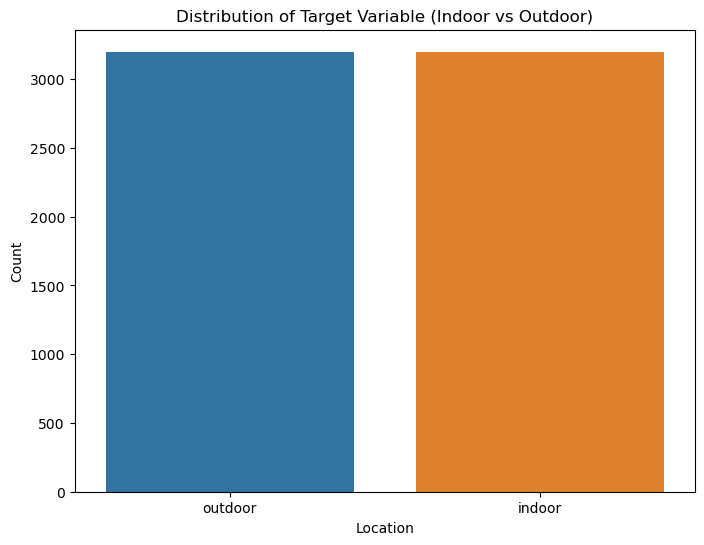

<Figure size 640x480 with 0 Axes>

In [8]:
# Plotting the distribution of the target variable 'location'
plt.figure(figsize=(8, 6))
sns.countplot(x='location', data=df)
plt.title('Distribution of Target Variable (Indoor vs Outdoor)')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()
plt.savefig("location_count.svg")

# Drop the unnecessary columns Seq Num and Battery Voltage and Anonymoous the dataset by removing timestamp

In [9]:
df = df.drop(['Timestamp', 'Seq Num', 'Battery Voltage (mV)'], axis=1)

# Checking the dataset after dropping the unnecessary columns

In [10]:
df.head(10)

Temperature (°C)  Humidity (%)  Light (lx)  UV Index  Pressure (hPa)  \
0             13.93         77.11           0      0.02           996.9   
1             24.11         54.73           0      0.02          1003.5   
2             13.40         76.79           0      0.02          1003.0   
3             25.74         57.78           3      0.02           997.2   
4             22.64         64.35           0      0.02           997.3   
5             24.08         54.15           0      0.02          1002.4   
6             24.06         54.15           0      0.02          1002.8   
7             19.60         69.70       18201      0.70           985.1   
8             12.54         78.93        4136      0.23          1003.0   
9             24.68         52.98          98      0.02          1008.2   

   Noise (dB)  Discomfort Index  Heatstroke (°C) location  
0       37.71             57.19            15.99  outdoor  
1       38.17             71.06            21.03   indoor  
2       45.64             56.35            15.53  outdoor  
3       40.16             73.61            22.84   indoor  
4       38.17             69.85            21.05   indoor  
5       37.94             70.97            20.99   indoor  
6       34.30             70.94            20.97   indoor  
7       53.68             65.73            19.22  outdoor  
8       43.01             54.96            15.23  outdoor  
9       36.98             71.65            21.26   indoor

In [11]:
df.head().to_excel("df_cleaned_top.xlsx", index=False)

In [12]:
df.tail()

Temperature (°C)  Humidity (%)  Light (lx)  UV Index  Pressure (hPa)  \
6395             25.84         56.82           6      0.02           997.3   
6396             18.04         75.87        5328      0.30           986.2   
6397             15.99         65.03           0      0.03          1002.2   
6398             26.70         49.31        8388      0.46          1009.8   
6399             17.70         76.93        2358      0.15           986.1   

      Noise (dB)  Discomfort Index  Heatstroke (°C) location  
6395       40.16             73.64            22.79   indoor  
6396       31.58             63.61            18.76  outdoor  
6397       44.09             60.24            15.95  outdoor  
6398       44.95             73.90            22.61   indoor  
6399       47.03             63.11            18.64  outdoor

# Summary statistics

In [13]:
summary_statistics_df = df.describe().round(2)
print(summary_statistics_df)

       Temperature (°C)  Humidity (%)  Light (lx)  UV Index  Pressure (hPa)  \
count           6400.00       6400.00     6400.00   6400.00         6400.00   
mean              20.57         63.29     2663.42      0.22          997.12   
std                4.41          9.15     5675.25      0.65            7.50   
min               11.86         43.39        0.00      0.01          983.50   
25%               17.01         55.64        0.00      0.02          988.50   
50%               22.32         60.23        0.00      0.02          999.60   
75%               24.08         71.63     1268.25      0.08         1002.40   
max               32.09         83.47    18259.00      7.68         1010.20   

       Noise (dB)  Discomfort Index  Heatstroke (°C)  
count     6400.00           6400.00          6400.00  
mean        40.61             66.45            19.35  
std          4.84              5.96             2.56  
min         31.58             53.95            13.97  
25%         3

In [14]:
summary_statistics_df.to_excel("summary_statistics_df.xlsx")

In [15]:
# Mean of the two classes

In [16]:
mean_df = df.groupby('location').mean()
print(mean_df)

          Temperature (°C)  Humidity (%)   Light (lx)  UV Index  \
location                                                          
indoor           23.881550     57.249406   761.848750  0.086591   
outdoor          17.250972     69.324822  4565.000625  0.359591   

          Pressure (hPa)  Noise (dB)  Discomfort Index  Heatstroke (°C)  
location                                                                 
indoor        999.045562   38.898756         70.948747        21.207522  
outdoor       995.197094   42.328509         61.947069        17.495447  


In [17]:
mean_df.to_excel("mean_df.xlsx")

In [18]:
std_df = df.groupby('location').std()
print(std_df)

          Temperature (°C)  Humidity (%)   Light (lx)  UV Index  \
location                                                          
indoor            1.685676      3.986135  3070.196636  0.325452   
outdoor           3.742026      8.878868  6911.336286  0.830052   

          Pressure (hPa)  Noise (dB)  Discomfort Index  Heatstroke (°C)  
location                                                                 
indoor          6.945517    3.773345          2.076504         1.208609  
outdoor         7.542615    5.176818          5.131456         2.171838  


In [19]:
std_df.to_excel("std_df.xlsx")

# Skewness

In [20]:
# Calculate skewness for each feature based on location
indoor_skewness = df[df['location'] == 'indoor'].drop('location', axis=1).skew()
outdoor_skewness = df[df['location'] == 'outdoor'].drop('location', axis=1).skew()

# Combine into a DataFrame
skewness_df = pd.DataFrame({'Indoor': indoor_skewness, 'Outdoor': outdoor_skewness}).round(2)

# Display the DataFrame
skewness_df

Indoor  Outdoor
Temperature (°C)    0.48     0.97
Humidity (%)        0.10    -0.68
Light (lx)          5.03     1.26
UV Index            6.19     4.83
Pressure (hPa)     -0.24    -0.30
Noise (dB)          2.85     1.12
Discomfort Index    0.00     0.66
Heatstroke (°C)    -0.06     0.83

In [21]:
skewness_df.to_excel("skewness_df.xlsx")

# kurtosis

In [22]:
# Calculate kurtosis for each feature based on location
indoor_kurtosis = df[df['location'] == 'indoor'].drop('location', axis=1).kurtosis()
outdoor_kurtosis = df[df['location'] == 'outdoor'].drop('location', axis=1).kurtosis()

# Combine into a DataFrame
kurtosis_df = pd.DataFrame({'Indoor': indoor_kurtosis, 'Outdoor': outdoor_kurtosis}).round(2)

# Display the DataFrame
kurtosis_df

Indoor  Outdoor
Temperature (°C)    2.40     1.12
Humidity (%)        1.54    -0.39
Light (lx)         24.77    -0.10
UV Index           38.87    29.20
Pressure (hPa)     -0.87    -1.66
Noise (dB)         15.20     1.27
Discomfort Index    1.93     0.32
Heatstroke (°C)     1.97     1.33

In [23]:
kurtosis_df.to_excel("kurtosis_df.xlsx")

# Visualisation with histograms and boxplots

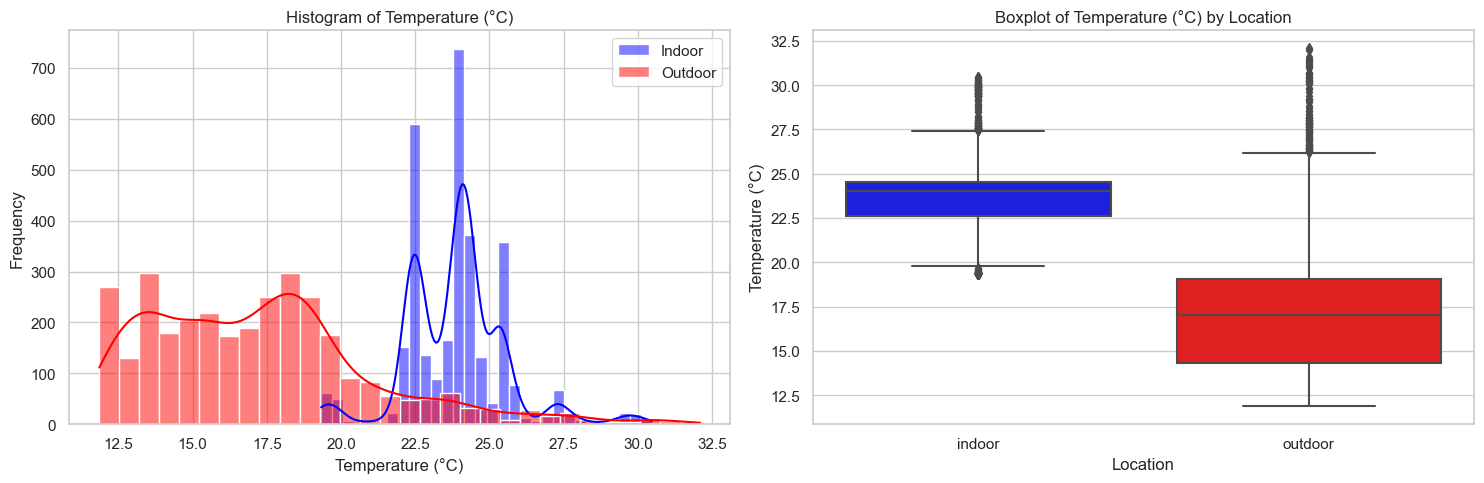

<Figure size 640x480 with 0 Axes>

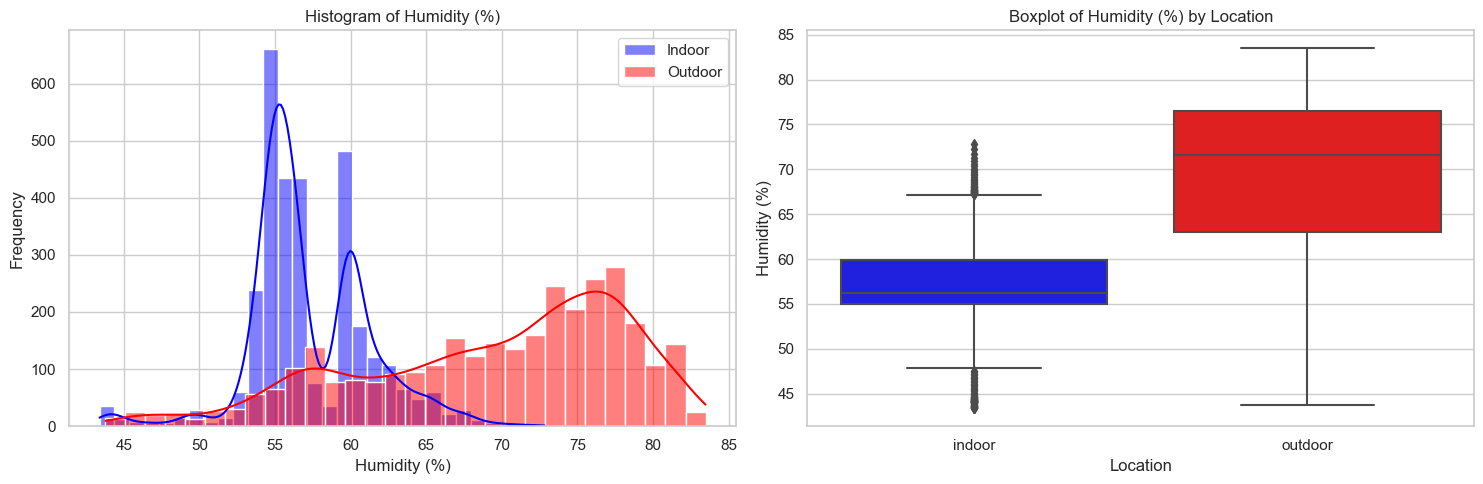

<Figure size 640x480 with 0 Axes>

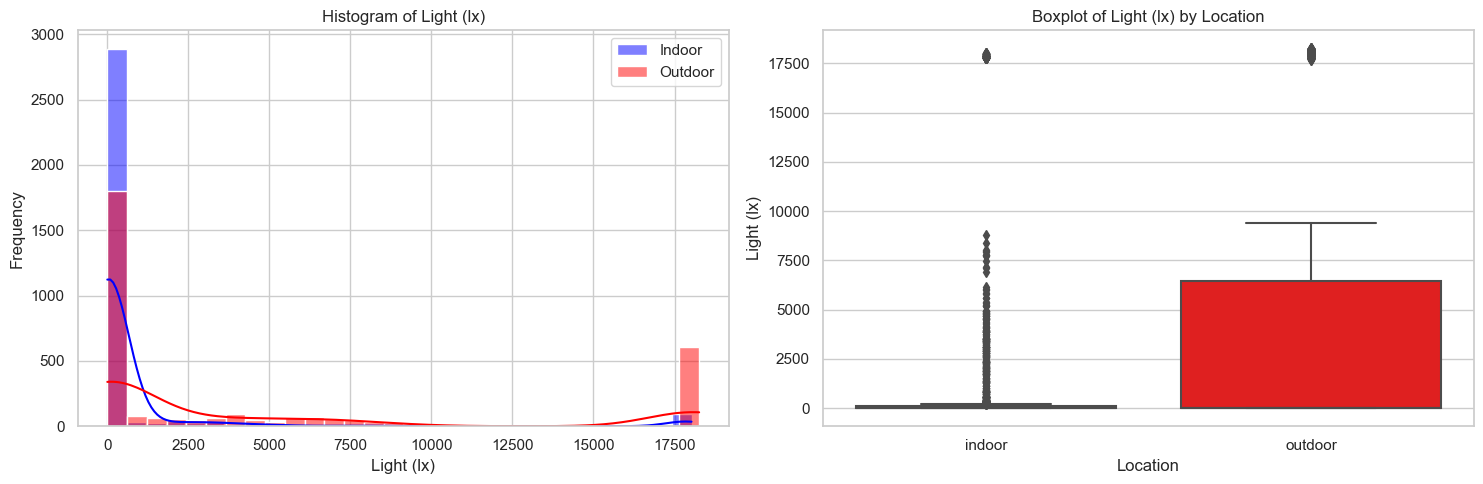

<Figure size 640x480 with 0 Axes>

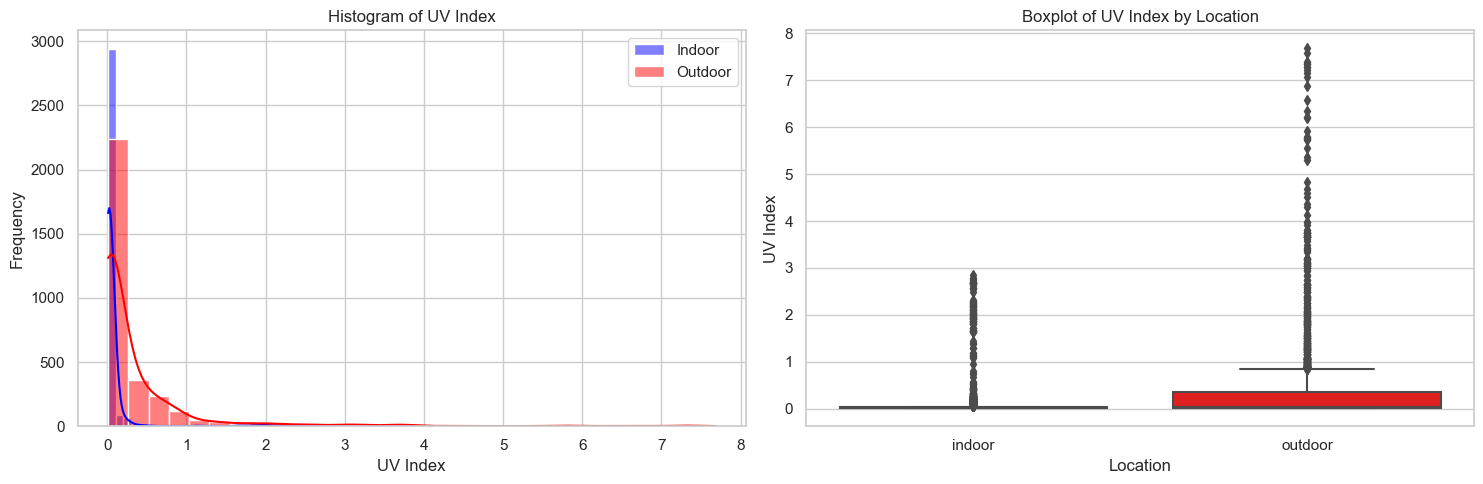

<Figure size 640x480 with 0 Axes>

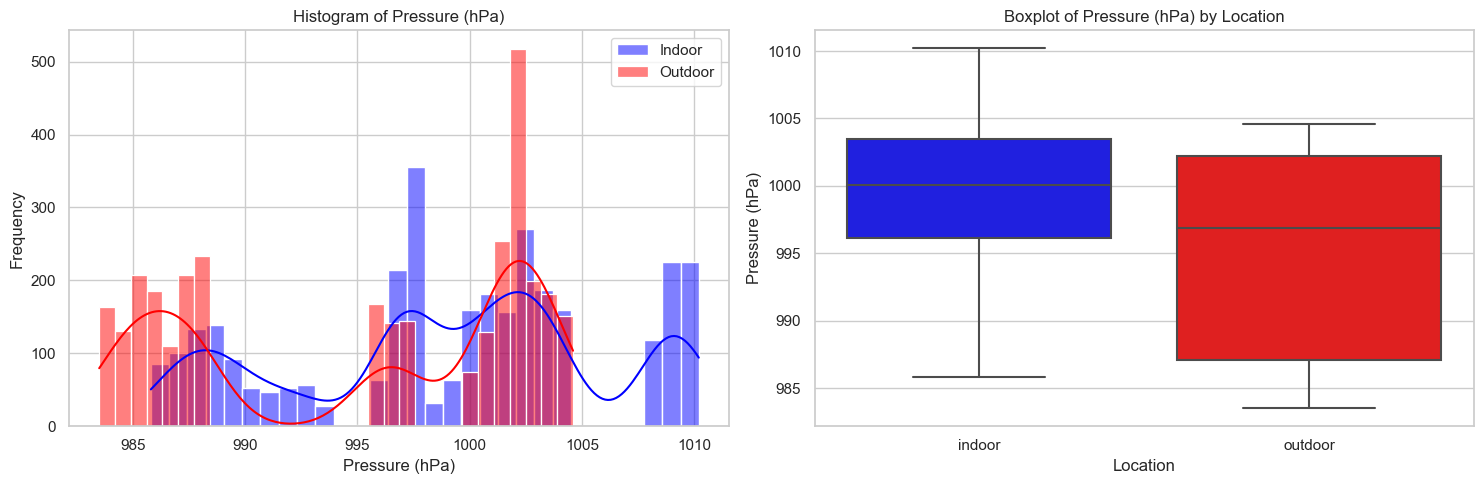

<Figure size 640x480 with 0 Axes>

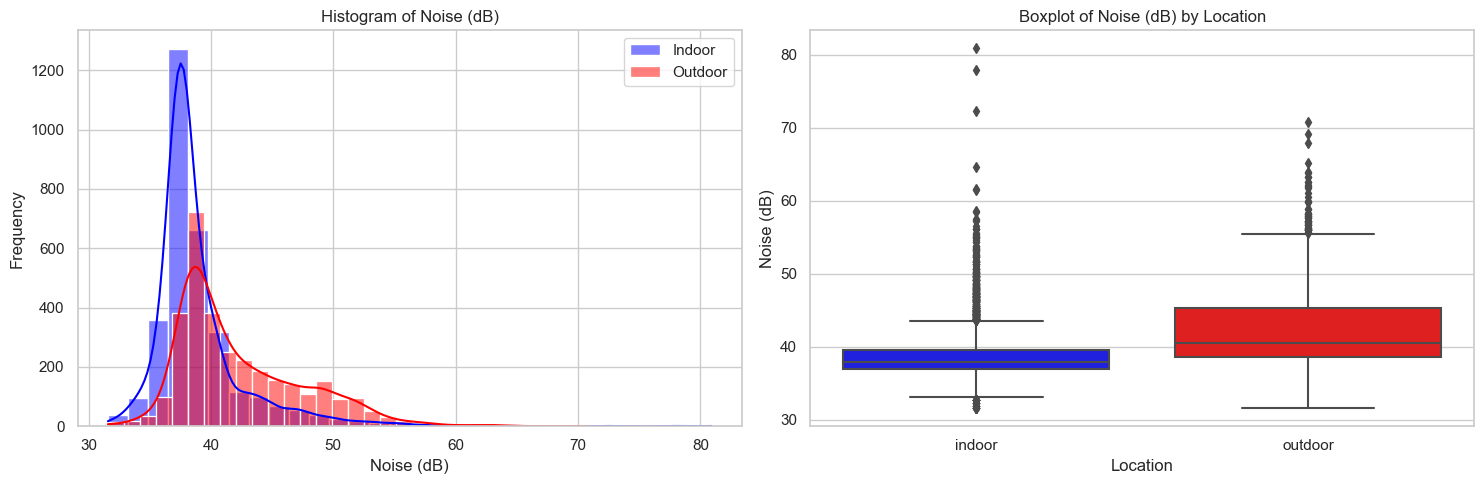

<Figure size 640x480 with 0 Axes>

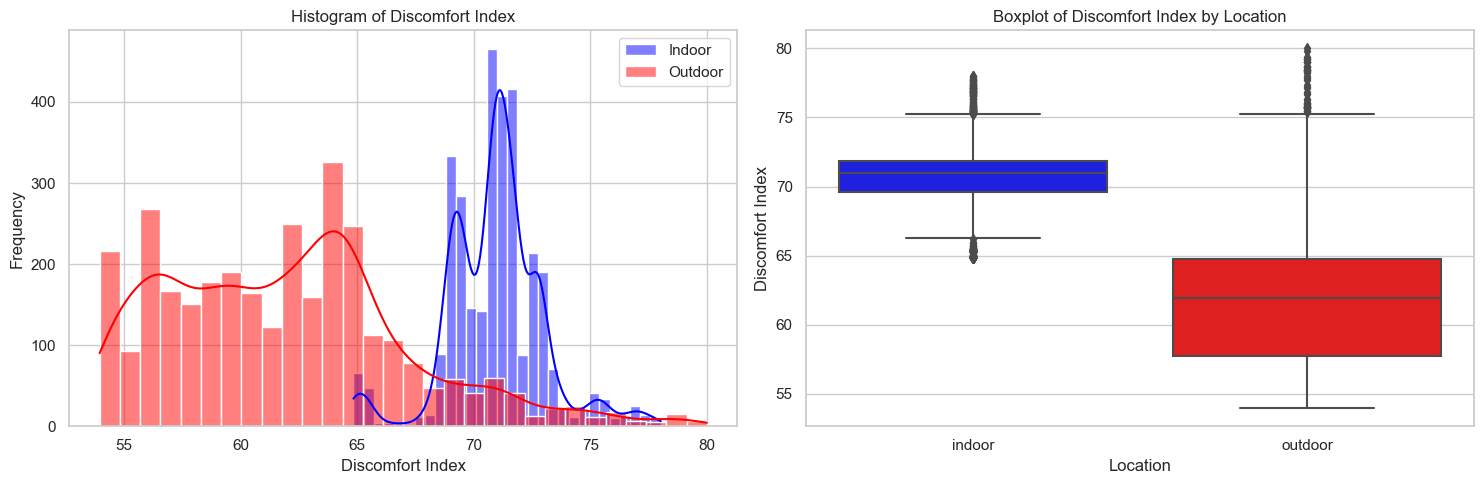

<Figure size 640x480 with 0 Axes>

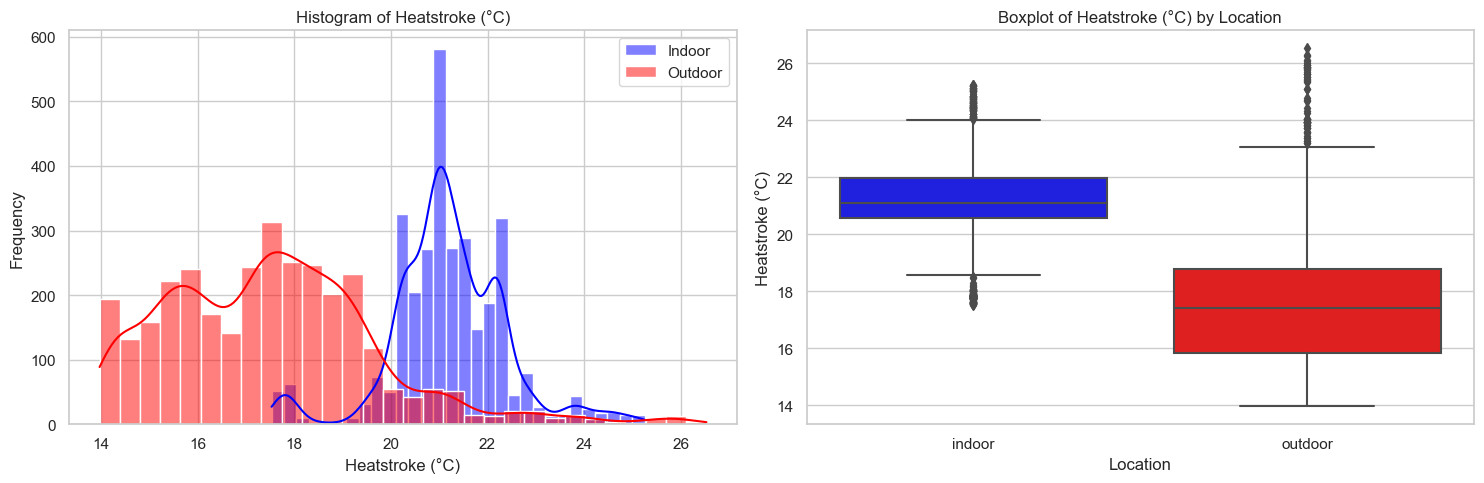

<Figure size 640x480 with 0 Axes>

In [24]:
features = ['Temperature (°C)', 'Humidity (%)', 'Light (lx)', 'UV Index', 'Pressure (hPa)', 'Noise (dB)', 'Discomfort Index', 'Heatstroke (°C)']

# Set the overall style
sns.set(style='whitegrid')

for feature in features:
    plt.figure(figsize=(15, 5))

    # Plotting histograms of both indoor and outdoor on the same subplot for comparison
    plt.subplot(1, 2, 1)
    sns.histplot(df[df['location'] == 'indoor'][feature], bins=30, color='blue', kde=True, label='Indoor')
    sns.histplot(df[df['location'] == 'outdoor'][feature], bins=30, color='red', kde=True, label='Outdoor', alpha=0.5)
    plt.title('Histogram of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

    # Boxplot to compare distributions of indoor and outdoor for the feature
    plt.subplot(1, 2, 2)
    sns.boxplot(x='location', y=feature, data=df, order=['indoor', 'outdoor'], palette={'indoor': 'blue', 'outdoor': 'red'})
    plt.title('Boxplot of ' + feature + ' by Location')
    plt.xlabel('Location')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()
    plt.savefig("histogram_boxplot_dr.svg")

# Outlier Detection

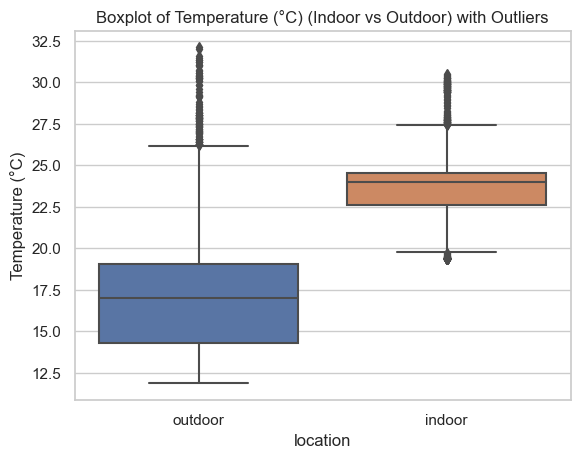

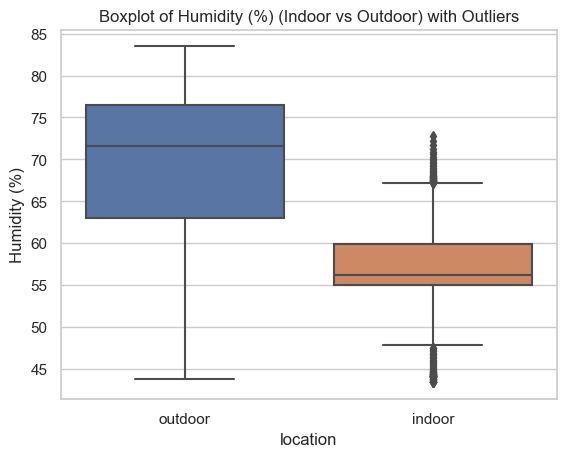

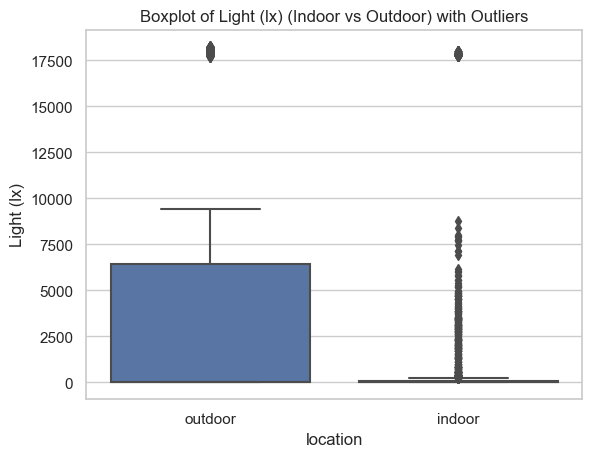

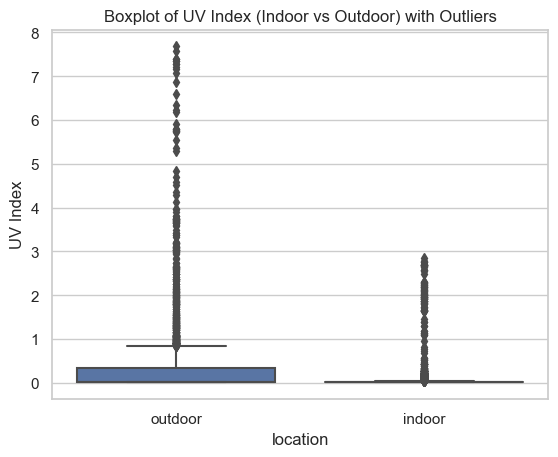

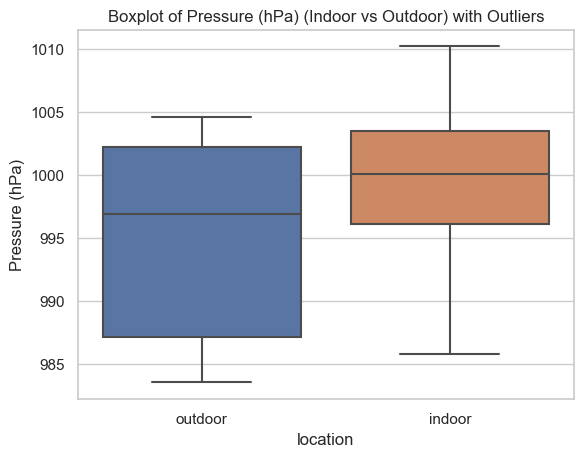

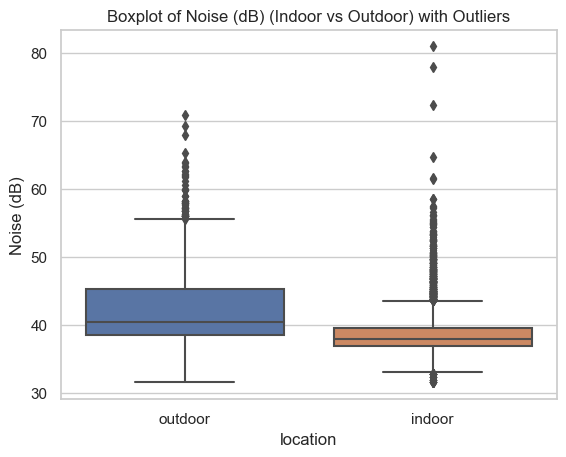

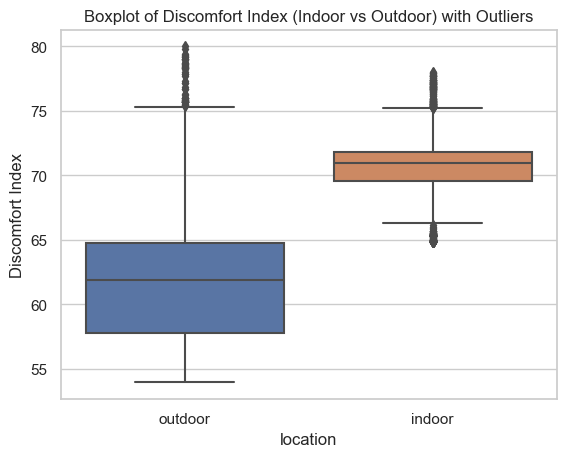

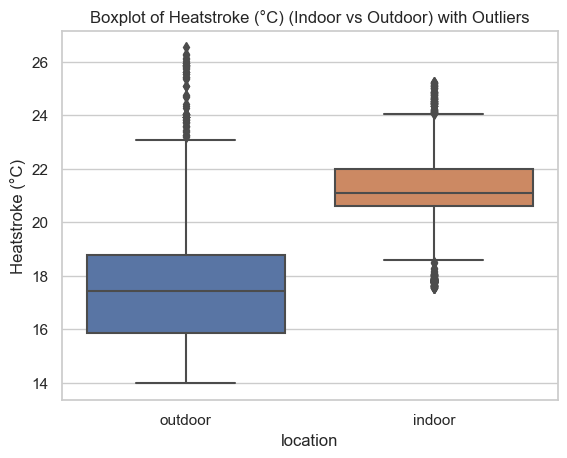

{'Temperature (°C)': 0, 'Humidity (%)': 0, 'Light (lx)': 1326, 'UV Index': 1385, 'Pressure (hPa)': 0, 'Noise (dB)': 393, 'Discomfort Index': 0, 'Heatstroke (°C)': 0}


In [25]:
# Function to detect outliers using the IQR method
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

features = ['Temperature (°C)', 'Humidity (%)', 'Light (lx)', 'UV Index','Pressure (hPa)', 'Noise (dB)', 'Discomfort Index', 'Heatstroke (°C)']  # Replace with actual feature names

# Plotting boxplots and identifying outliers for numerical features
outliers_summary = {}
for feature in features:
    outliers = detect_outliers(df, feature)
    outliers_summary[feature] = len(outliers)
    sns.boxplot(x='location', y=feature, data=df)
    plt.title(f'Boxplot of {feature} (Indoor vs Outdoor) with Outliers')
    plt.show()

print(outliers_summary)

In [26]:
# Let us investigate outliers further

In [27]:
# Function to display descriptive statistics and samples of outliers
def investigate_outliers(df, feature):
    outliers = detect_outliers(df, feature)
    description = outliers.describe()
    sample_outliers = outliers.sample(min(5, len(outliers)))
    return description, sample_outliers

# List of features to investigate for outliers
features_to_investigate = ['Light (lx)', 'UV Index', 'Noise (dB)']

# Investigating outliers for the specified features
outliers_analysis = {}
for feature in features_to_investigate:
    description, sample_outliers = investigate_outliers(df, feature)
    outliers_analysis[feature] = {'description': description, 'sample_outliers': sample_outliers}

outliers_analysis

{'Light (lx)': {'description':        Temperature (°C)  Humidity (%)    Light (lx)     UV Index  \
  count       1326.000000   1326.000000   1326.000000  1326.000000   
  mean          21.357202     62.218658  12194.716440     0.964163   
  std            4.193558     10.304076   6310.058101     1.145864   
  min           12.250000     43.390000   3186.000000     0.180000   
  25%           18.632500     54.127500   5801.000000     0.320000   
  50%           20.460000     60.340000  17771.500000     0.550000   
  75%           23.880000     72.802500  18079.750000     1.040000   
  max           32.090000     78.940000  18259.000000     7.680000   
  
         Pressure (hPa)   Noise (dB)  Discomfort Index  Heatstroke (°C)  
  count     1326.000000  1326.000000       1326.000000      1326.000000  
  mean       995.554449    44.850551         67.466629        19.820400  
  std          9.699064     5.230992          5.274538         2.313558  
  min        983.500000    31.580000      

In [28]:
# Let us investigate Noise (dB) further since it is associated with both indoor and outdoor

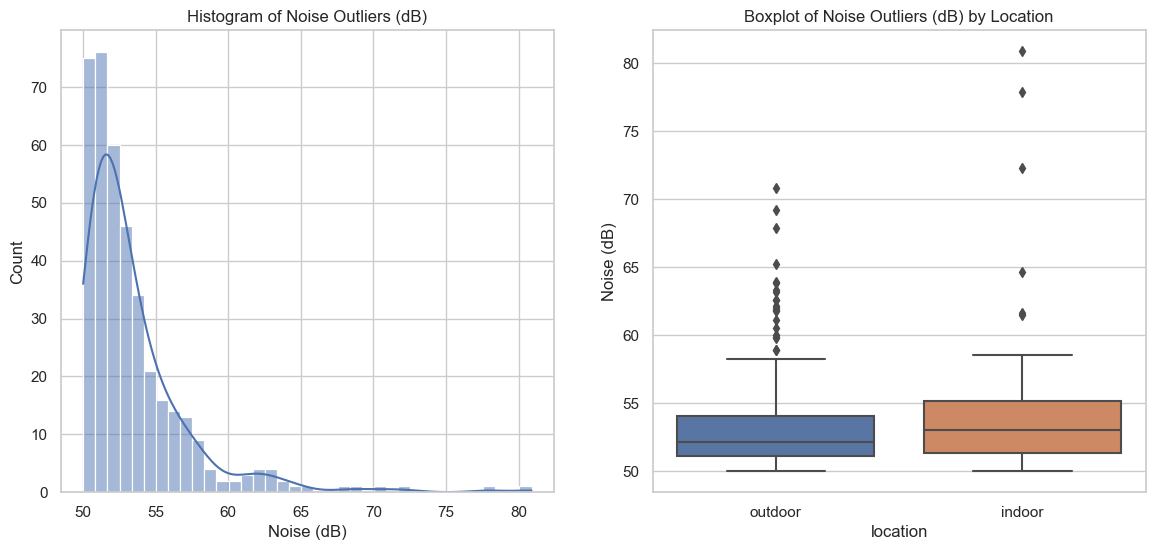

(       Temperature (°C)  Humidity (%)    Light (lx)    UV Index  \
 count        393.000000    393.000000    393.000000  393.000000   
 mean          20.023104     63.914300   7824.101781    0.657125   
 std            3.607701      8.769017   7863.363141    1.177529   
 min           11.950000     47.080000      0.000000    0.010000   
 25%           17.980000     56.370000    142.000000    0.030000   
 50%           20.020000     60.290000   4917.000000    0.270000   
 75%           22.510000     72.880000  18036.000000    0.710000   
 max           30.390000     80.980000  18243.000000    7.400000   
 
        Pressure (hPa)  Noise (dB)  Discomfort Index  Heatstroke (°C)  
 count      393.000000  393.000000        393.000000       393.000000  
 mean       994.160560   53.434122         65.772824        18.952087  
 std          8.868112    3.850315          4.897315         1.955092  
 min        983.600000   50.000000         54.080000        14.550000  
 25%        984.800000   5

In [29]:
# Detecting outliers for the "Noise (dB)" feature
noise_outliers = detect_outliers(df, 'Noise (dB)')

# Descriptive statistics of noise outliers
noise_outliers_description = noise_outliers.describe()
noise_outliers_description.to_excel("noise_outliers_description.xlsx")

# Plotting histogram and boxplot for noise outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(noise_outliers, x='Noise (dB)', kde=True)
plt.title('Histogram of Noise Outliers (dB)')

plt.subplot(1, 2, 2)
sns.boxplot(x='location', y='Noise (dB)', data=noise_outliers)
plt.title('Boxplot of Noise Outliers (dB) by Location')

plt.show()

noise_outliers_description, noise_outliers['location'].value_counts()

# Test for normality using Kolmogorov-Smirnov test

In [30]:
# List of features
features = ['Temperature (°C)', 'Humidity (%)', 'Light (lx)', 'UV Index', 'Pressure (hPa)', 'Noise (dB)', 'Discomfort Index', 'Heatstroke (°C)']

# Function to perform Kolmogorov-Smirnov test
def perform_ks_test(data_indoor, data_outdoor, feature):
    result_ks_indoor = stats.ks_2samp(data_indoor, data_outdoor)
    return result_ks_indoor

In [31]:
results = []

for feature in features:
    data_indoor = df[df['location'] == 'indoor'][feature]
    data_outdoor = df[df['location'] == 'outdoor'][feature]

    result_ks = perform_ks_test(data_indoor, data_outdoor, feature)
    results.append([feature, result_ks.statistic, result_ks.pvalue])

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Feature', 'KS Test Statistic', 'p-value'])

# Display the results DataFrame
print(results_df)

            Feature  KS Test Statistic        p-value
0  Temperature (°C)           0.848437   0.000000e+00
1      Humidity (%)           0.675000   0.000000e+00
2        Light (lx)           0.344062  2.523285e-168
3          UV Index           0.337813  3.720340e-162
4    Pressure (hPa)           0.285000  7.203421e-115
5        Noise (dB)           0.391250  6.458513e-219
6  Discomfort Index           0.846562   0.000000e+00
7   Heatstroke (°C)           0.827812   0.000000e+00


In [32]:
results_df.to_excel("results_df.xlsx")

In [33]:
# Print the result of the test

In [34]:
# List of features
features = ['Temperature (°C)', 'Humidity (%)', 'Light (lx)', 'UV Index', 'Pressure (hPa)', 'Noise (dB)', 'Discomfort Index', 'Heatstroke (°C)']

# Function to generate Q-Q plots
def generate_qq_plots(data_indoor, data_outdoor, feature):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    stats.probplot(data_indoor, dist='norm', plot=plt)
    plt.title(f"Q-Q Plot for {feature} (Indoor)")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")

    plt.subplot(1, 2, 2)
    stats.probplot(data_outdoor, dist='norm', plot=plt)
    plt.title(f"Q-Q Plot for {feature} (Outdoor)")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")

    plt.tight_layout()
    plt.show()

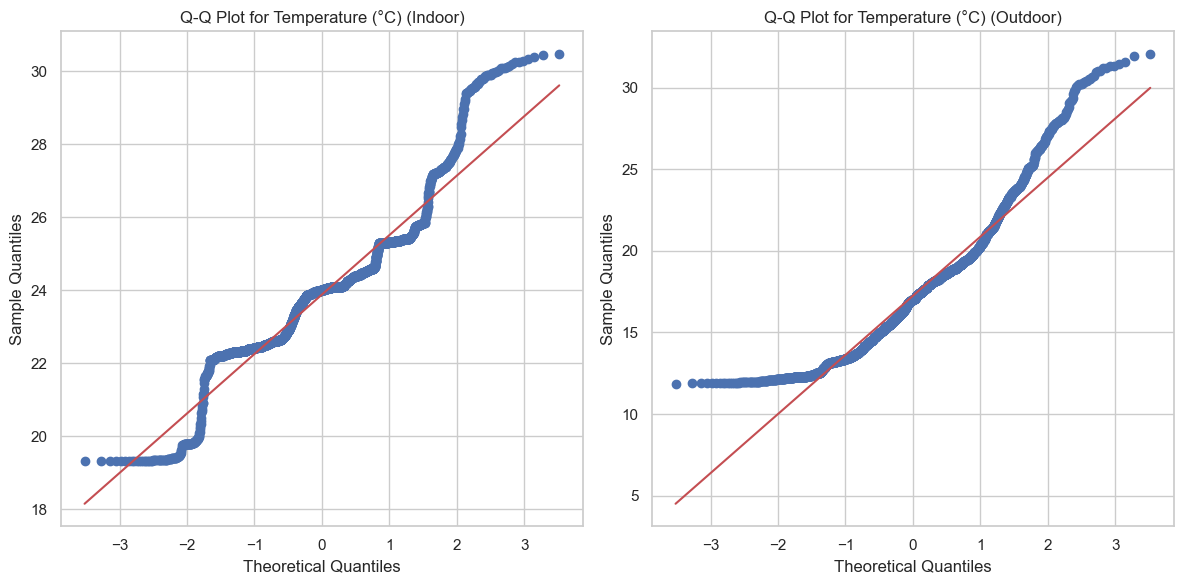

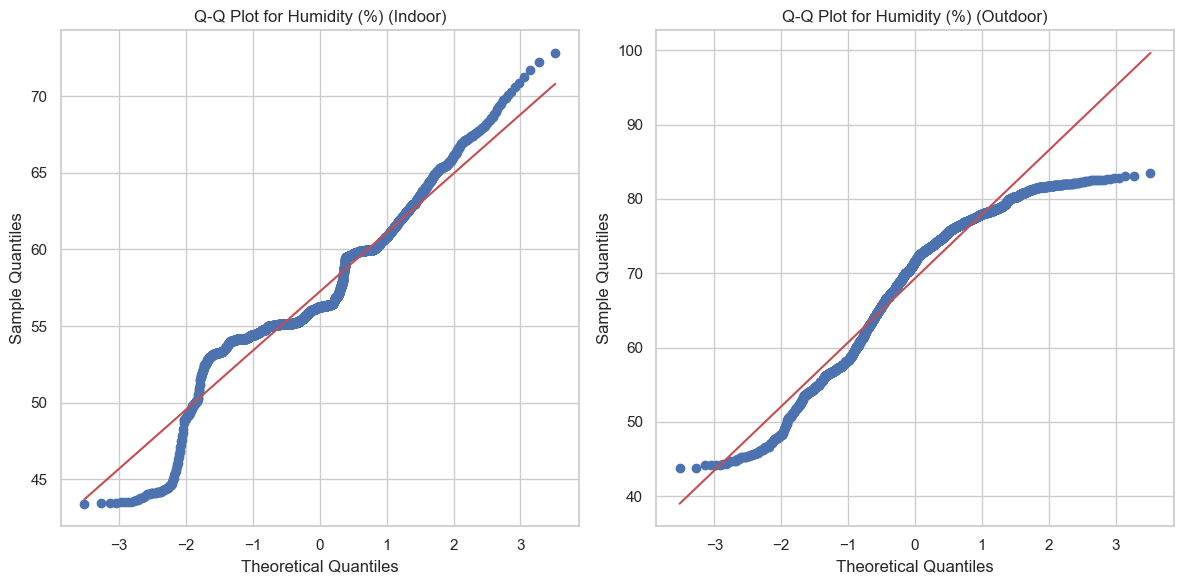

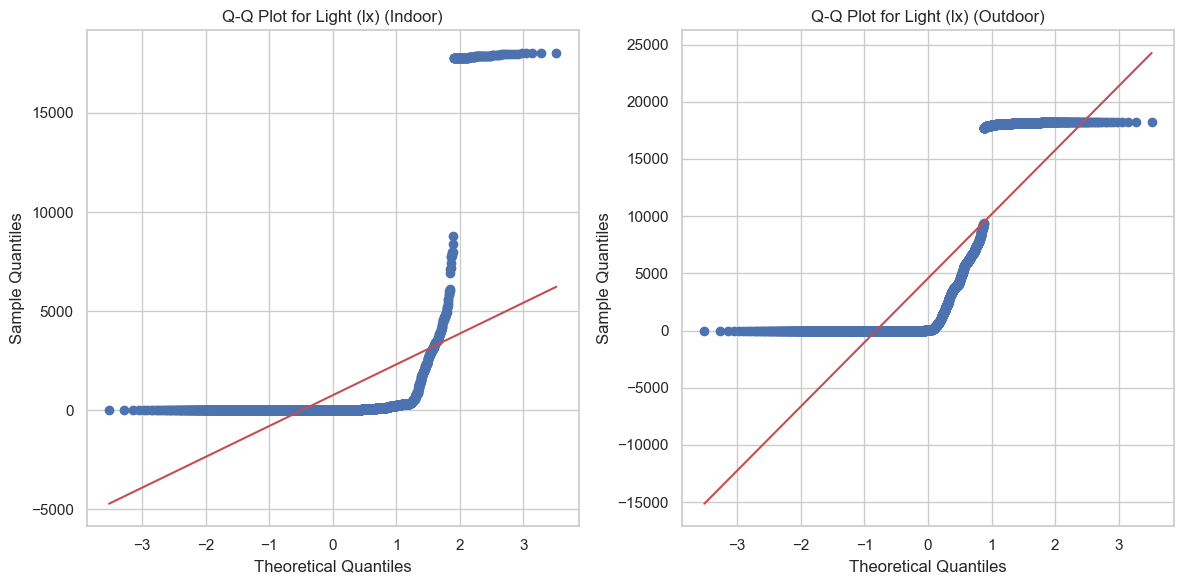

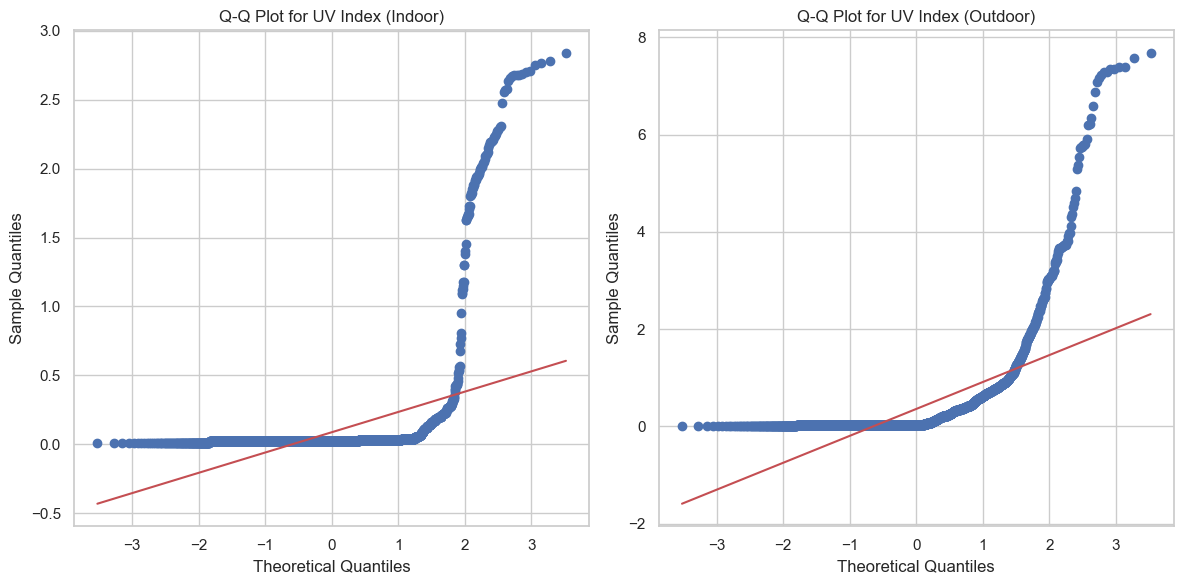

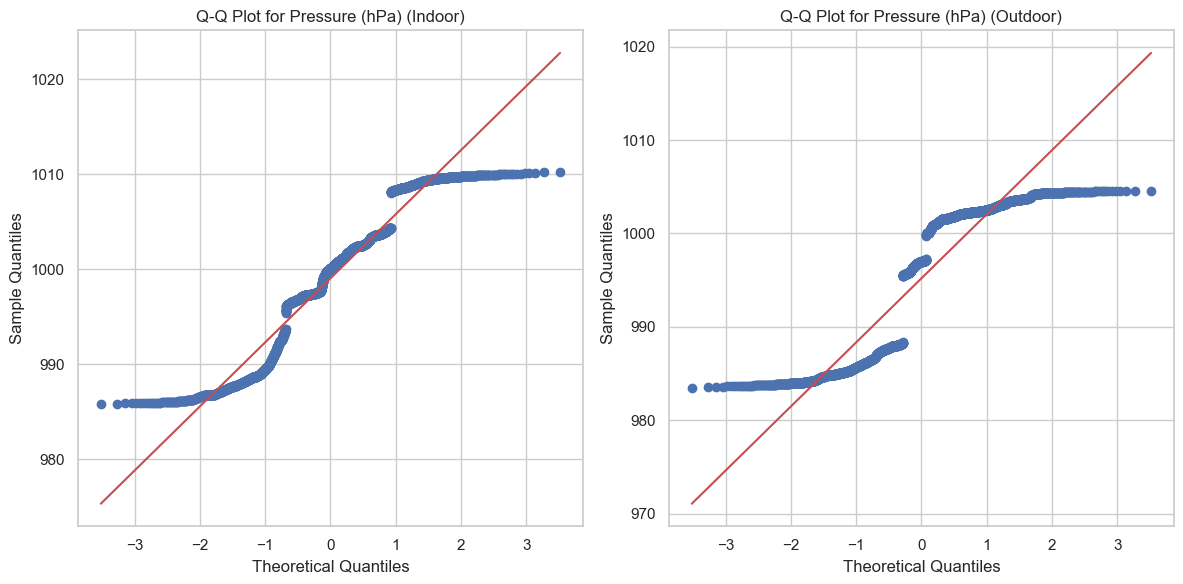

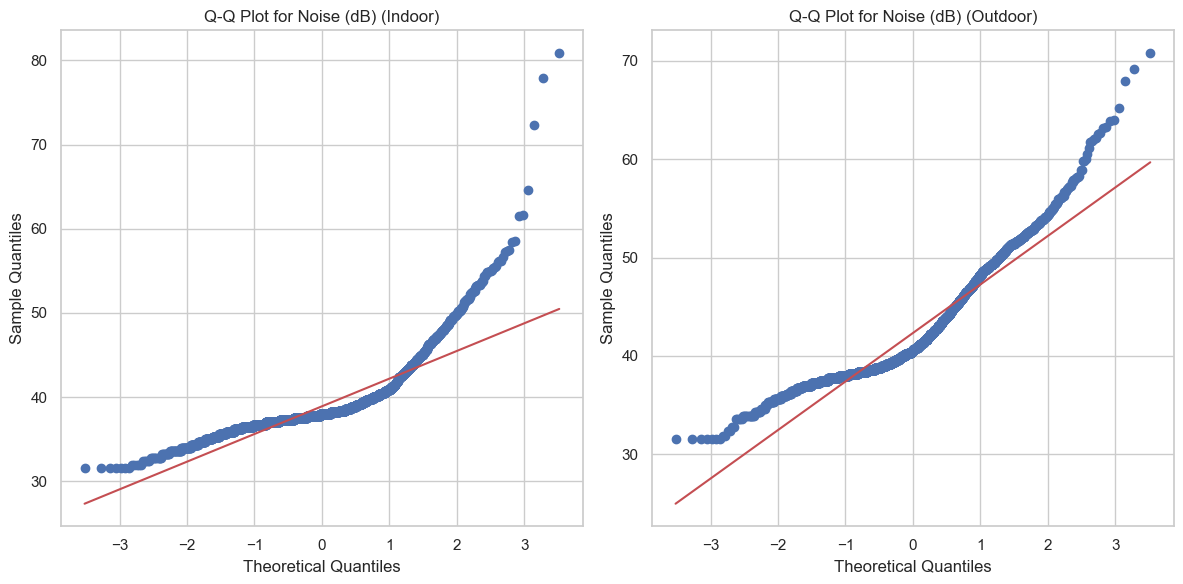

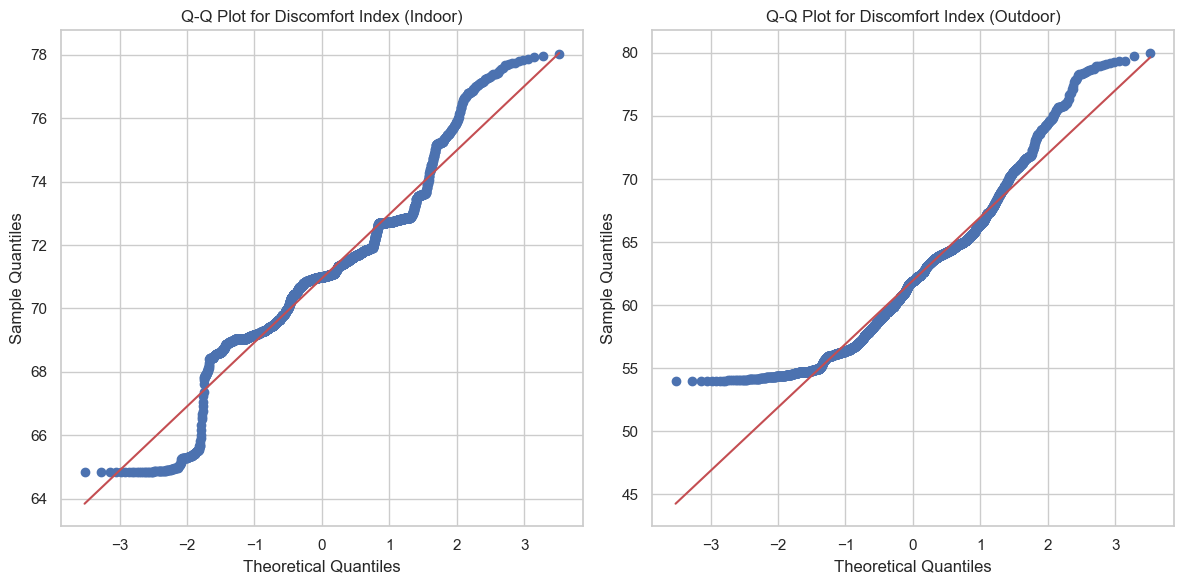

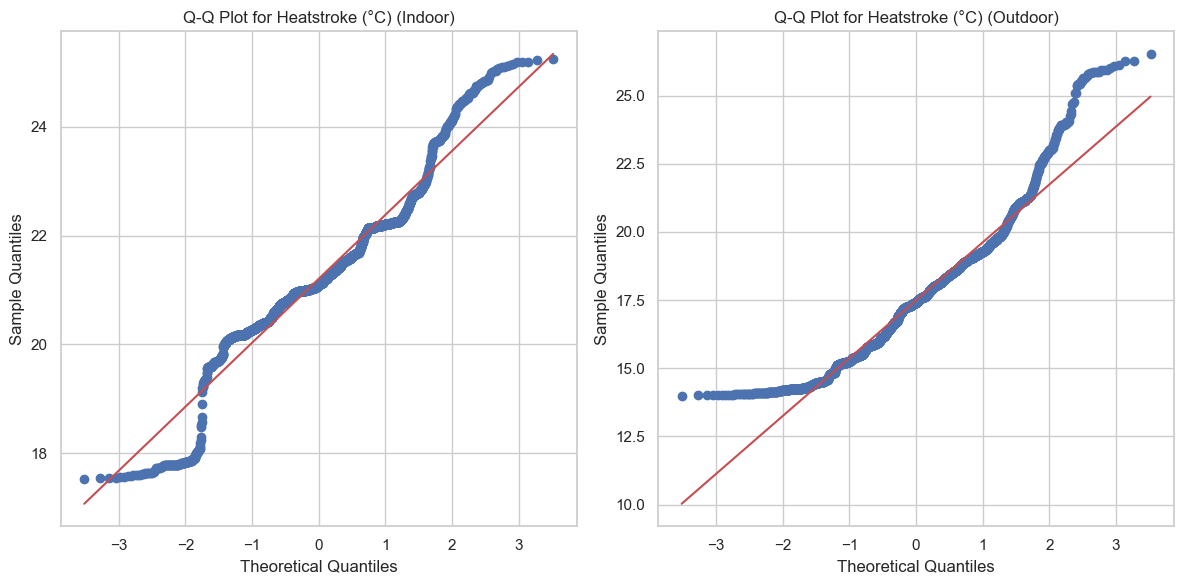

In [35]:
# Assuming 'df' is your DataFrame
for feature in features:
    data_indoor = df[df['location'] == 'indoor'][feature]
    data_outdoor = df[df['location'] == 'outdoor'][feature]

    generate_qq_plots(data_indoor, data_outdoor, feature)

# Mann-Whitney U test testing for central tendency difference

In [36]:
from scipy import stats
import pandas as pd

# List of numerical features
numerical_features = ['Temperature (°C)', 'Humidity (%)', 'Light (lx)', 'UV Index', 'Pressure (hPa)', 'Noise (dB)', 'Discomfort Index', 'Heatstroke (°C)']

# Empty dictionary to store Mann-Whitney U test results
mannwhitney_results = {}

# Perform Mann-Whitney U test for each numerical feature
for feature in numerical_features:
    data_indoor = df[df['location'] == 'indoor'][feature]
    data_outdoor = df[df['location'] == 'outdoor'][feature]

    # Perform Mann-Whitney U test
    mannwhitney_result = stats.mannwhitneyu(data_indoor, data_outdoor, alternative='two-sided')
    mannwhitney_results[feature] = mannwhitney_result

# Create a DataFrame to store the results
results_df_mw = pd.DataFrame(mannwhitney_results).T
results_df_mw.columns = ['U-statistic', 'p-value']

# A column is created to indicate if there is a significant difference or not
threshold = 0.05
results_df_mw['Significant'] = results_df['p-value'] < threshold

# Display Mann-Whitney U test results
print("Mann-Whitney U Test Results:")
print(results_df_mw)

Mann-Whitney U Test Results:
                  U-statistic        p-value Significant
Temperature (°C)    9549561.5   0.000000e+00         NaN
Humidity (%)        1322764.5   0.000000e+00         NaN
Light (lx)          3762836.0   1.206761e-88         NaN
UV Index            3667994.5  4.783928e-101         NaN
Pressure (hPa)      6541485.0   1.905696e-82         NaN
Noise (dB)          2594475.5  3.889052e-256         NaN
Discomfort Index    9570025.0   0.000000e+00         NaN
Heatstroke (°C)     9518565.0   0.000000e+00         NaN


In [37]:
results_df_mw.to_excel("results_df_mw.xlsx")

# Correlation Matrix

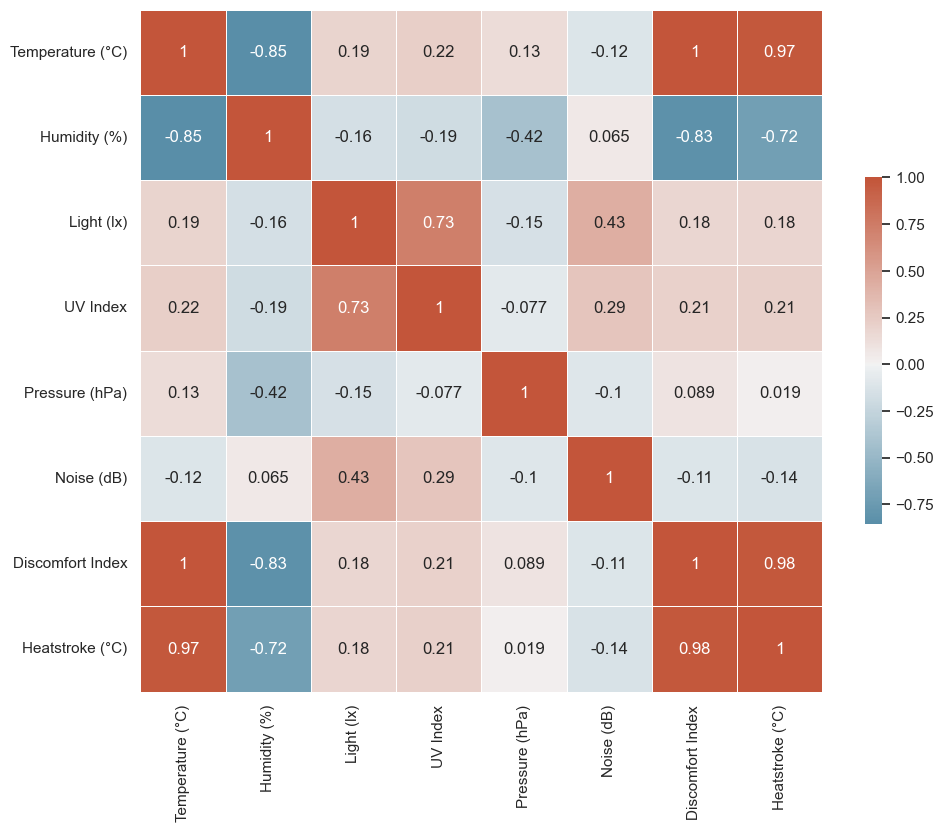

In [38]:
# Compute the correlation matrix
corr = df.drop('location', axis=1).corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9)) # You can adjust the figure size here

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [39]:
corr = df.drop('location', axis=1).corr()
print(corr)

                  Temperature (°C)  Humidity (%)  Light (lx)  UV Index  \
Temperature (°C)          1.000000     -0.854822    0.189375  0.218199   
Humidity (%)             -0.854822      1.000000   -0.163605 -0.194886   
Light (lx)                0.189375     -0.163605    1.000000  0.725367   
UV Index                  0.218199     -0.194886    0.725367  1.000000   
Pressure (hPa)            0.134285     -0.419340   -0.149212 -0.076663   
Noise (dB)               -0.115050      0.064798    0.432817  0.285127   
Discomfort Index          0.997563     -0.832964    0.180985  0.206449   
Heatstroke (°C)           0.973077     -0.715343    0.182360  0.214209   

                  Pressure (hPa)  Noise (dB)  Discomfort Index  \
Temperature (°C)        0.134285   -0.115050          0.997563   
Humidity (%)           -0.419340    0.064798         -0.832964   
Light (lx)             -0.149212    0.432817          0.180985   
UV Index               -0.076663    0.285127          0.206449   
Pre

# Pairplots

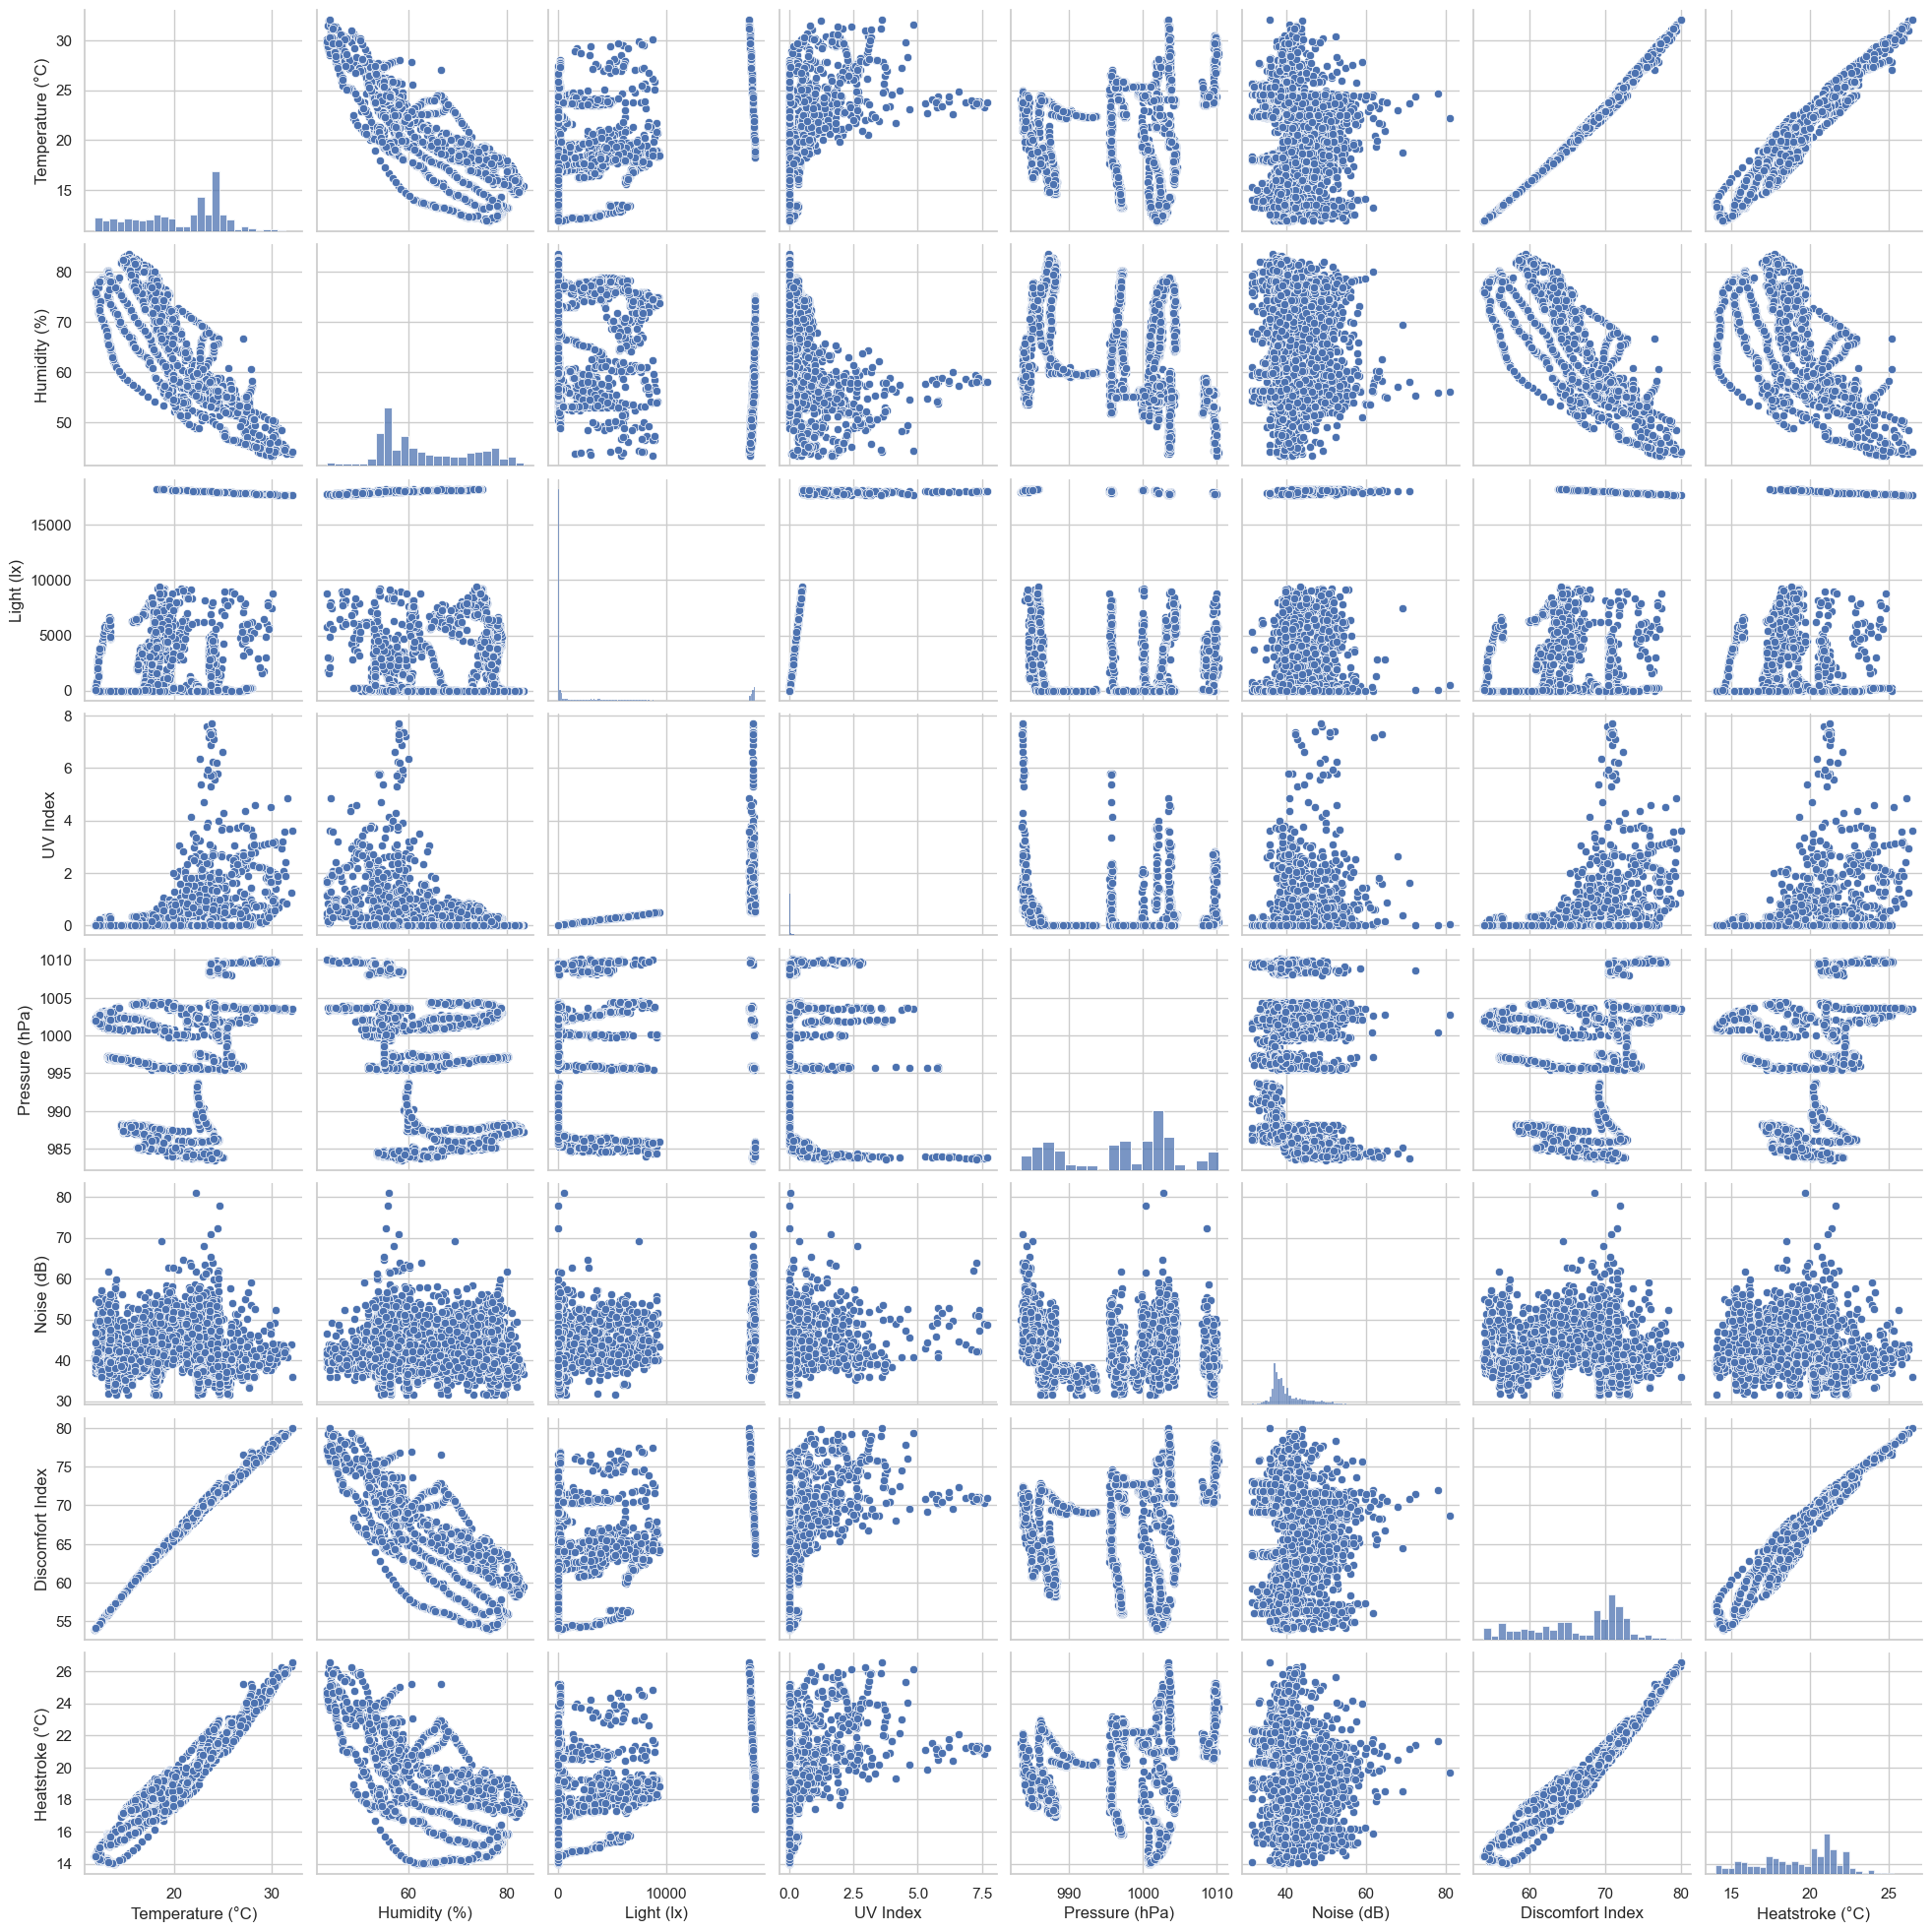

In [40]:
sns.pairplot(df.drop('location', axis=1))
plt.show()

# Dropping light lx Column

In [41]:
df = df.drop(['Light (lx)'], axis=1)

In [42]:
df.head()

Temperature (°C)  Humidity (%)  UV Index  Pressure (hPa)  Noise (dB)  \
0             13.93         77.11      0.02           996.9       37.71   
1             24.11         54.73      0.02          1003.5       38.17   
2             13.40         76.79      0.02          1003.0       45.64   
3             25.74         57.78      0.02           997.2       40.16   
4             22.64         64.35      0.02           997.3       38.17   

   Discomfort Index  Heatstroke (°C) location  
0             57.19            15.99  outdoor  
1             71.06            21.03   indoor  
2             56.35            15.53  outdoor  
3             73.61            22.84   indoor  
4             69.85            21.05   indoor

# Feature Selection Methods

In [43]:
# import necessary libraries

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
#Let us split the dataset

In [46]:
X = df.drop('location', axis=1)
y = df['location']

In [47]:
# Define the target variable
y = df['location']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

# The encoded values are now in y_encoded
print(y_encoded)

[1 0 1 ... 1 0 1]


In [48]:
# Using random seed of 1 to make the result reproducible

In [49]:
random_seed = 1

In [50]:
#Performing train-test split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y, random_state=random_seed)

In [52]:
# Checking the shapes of the training and testing sets

In [53]:
X_train_shape = X_train.shape
X_test_shape = X_test.shape
X_train_shape, X_test_shape

((5120, 7), (1280, 7))

In [54]:
# let visualise the importance of each feature using the feature selection methods

In [55]:
from sklearn.feature_selection import mutual_info_classif, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier

# Compute Mutual Information
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)

# Compute ANOVA F-value
fval, _ = f_classif(X_train, y_train)
fval = pd.Series(fval, index=X_train.columns).sort_values(ascending=False)

# Compute Chi-Squared
chi2val, _ = chi2(X_train, y_train)
chi2val = pd.Series(chi2val, index=X_train.columns).sort_values(ascending=False)

# Compute RFE (using Random Forest for ranking)
rf = RandomForestClassifier(random_state= random_seed)
rfe = RFE(estimator=rf, n_features_to_select=1)
rfe.fit(X_train, y_train)
rfe = pd.Series(rfe.ranking_, index=X_train.columns).sort_values()

# Compute Feature Importance from Random Forest
rf.fit(X_train, y_train)
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Combine the results into a single dataframe
feature_selection_results = pd.DataFrame({
    'Mutual Information': mi,
    'ANOVA F-value': fval,
    'Chi-Squared': chi2val,
    'RFE': rfe,
    'Random Forest Importance': rf_importance
}).round(2)

# Display the feature selection results
feature_selection_results

Mutual Information  ANOVA F-value  Chi-Squared  RFE  \
Discomfort Index                0.51        6966.59      1593.71    1   
Heatstroke (°C)                 0.49        5973.67       940.26    3   
Humidity (%)                    0.38        3944.71      2932.62    5   
Noise (dB)                      0.10         736.36       364.83    7   
Pressure (hPa)                  0.27         341.79        17.98    6   
Temperature (°C)                0.52        6882.79      2793.12    2   
UV Index                        0.10         236.62       393.58    4   

                  Random Forest Importance  
Discomfort Index                      0.24  
Heatstroke (°C)                       0.19  
Humidity (%)                          0.13  
Noise (dB)                            0.03  
Pressure (hPa)                        0.09  
Temperature (°C)                      0.22  
UV Index                              0.10

In [56]:
feature_selection_results.to_excel("feature_selection_results.xlsx")

In [57]:
# Let us visualise in bar plots

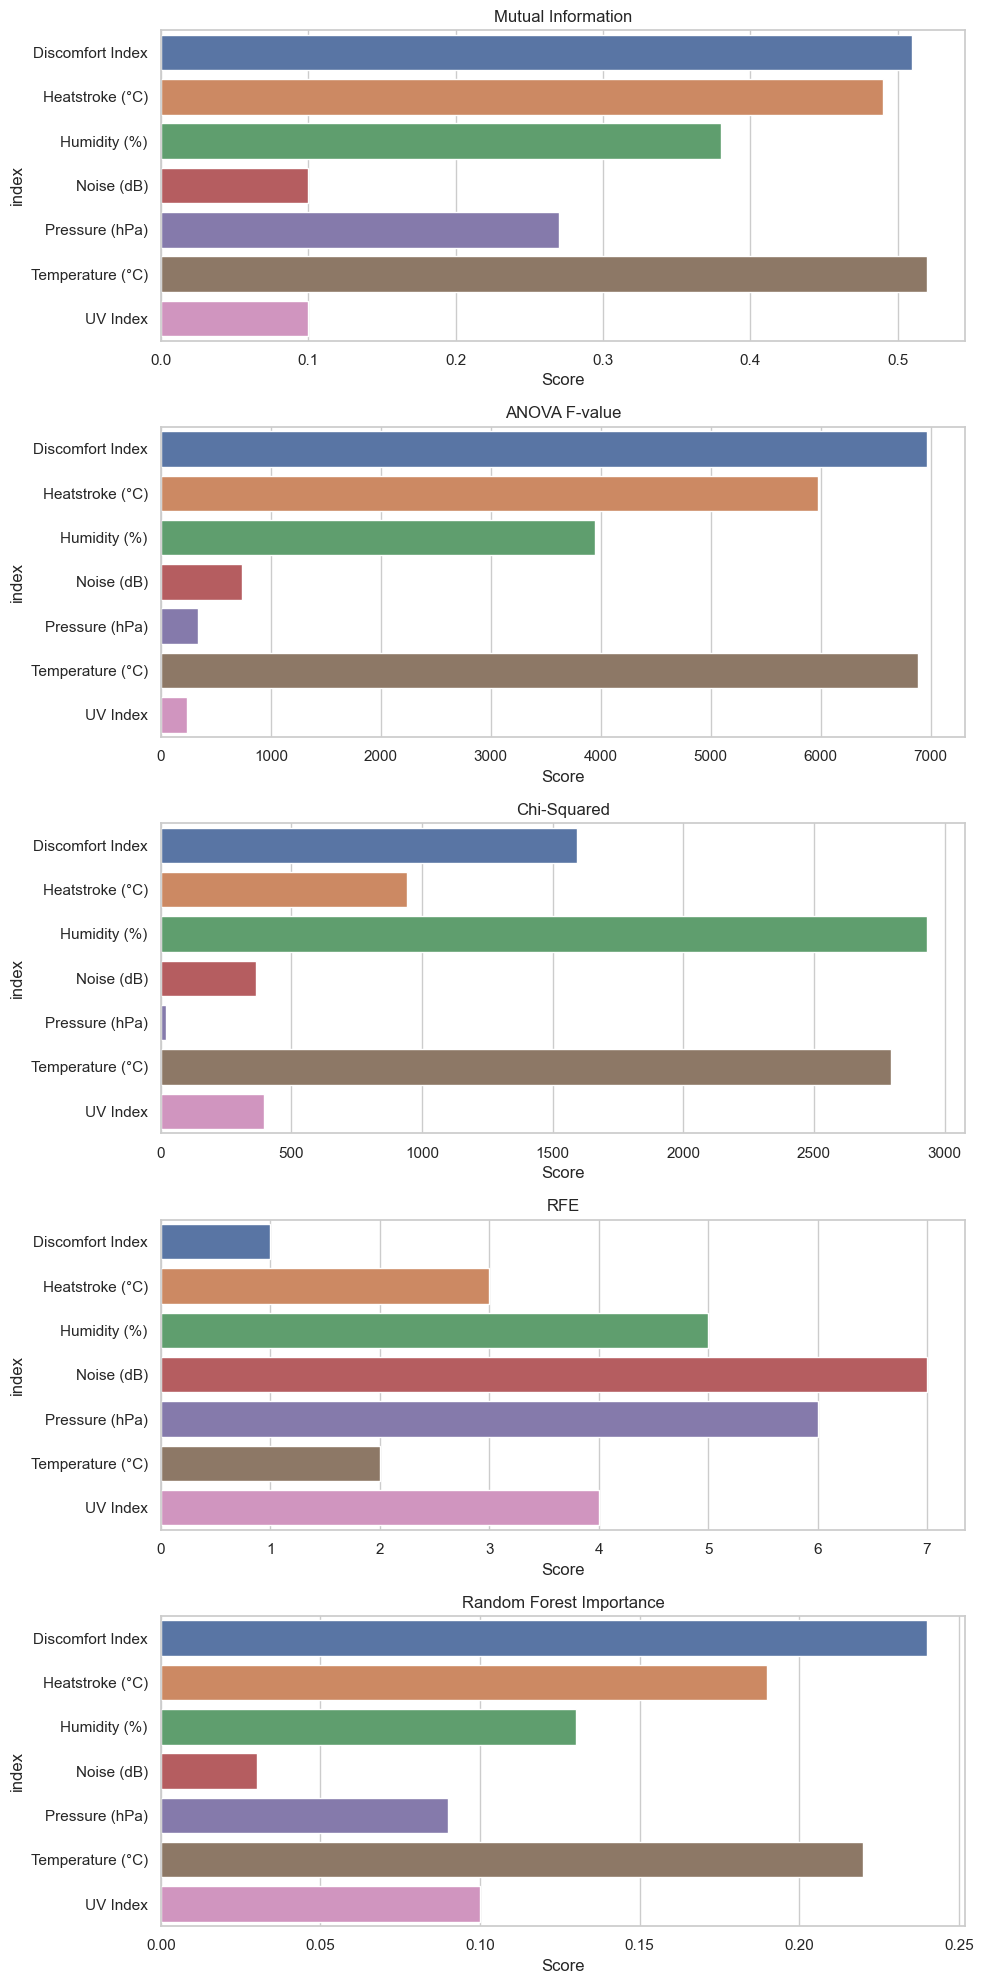

In [58]:
# Melt the DataFrame to make it suitable for seaborn's barplot function
feature_selection_results_melted = feature_selection_results.reset_index().melt(id_vars='index', var_name='Method', value_name='Score')

# Initialize the plot
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

methods = feature_selection_results_melted['Method'].unique()

for i, method in enumerate(methods):
    # Subset to the method
    subset = feature_selection_results_melted[feature_selection_results_melted['Method'] == method]
    # Make a separate list for each method
    sns.barplot(x='Score', y='index', data=subset, ax=axes[i])
    axes[i].set_title(method)

# Show the plot
plt.tight_layout()
plt.show()

# Machine Learning Methods: Here Several Machine Learning Models will be run

In [59]:
#Feature scaling using Min-Max method, this allow all the features to be in the scales

In [60]:
#Import the necessary libraries

In [61]:

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
import joblib

In [62]:
# Instantiate the scaler
scaler = RobustScaler()

# Let us save it for later use
joblib.dump(scaler, 'scaler.pkl')

# Fit the scaler to the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

Temperature (°C)  Humidity (%)   UV Index  Pressure (hPa)  Noise (dB)  \
0         -1.411848      0.741070   0.000000        0.131387   -0.227459   
1          0.244006     -0.391808  -0.166667        0.197080   -0.180328   
2          0.331453     -0.452770   0.166667        0.613139   -0.088115   
3          0.200282      0.165106   0.000000       -0.897810   -0.088115   
4          0.730606     -0.922051  11.666667        0.277372   -0.180328   

   Discomfort Index  Heatstroke (°C)  
0         -1.550776        -1.541667  
1          0.209093         0.229167  
2          0.289681         0.328125  
3          0.251565         0.429688  
4          0.597876         0.695313

In [63]:
X_train_scaled.to_excel("X_train_scaled.xlsx")

In [64]:
# Let us save the scaler for later use

In [65]:
from joblib import dump

# Save the scaler to a file
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [66]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [67]:
# Initiate the models
lr = LogisticRegression(random_state=random_seed)
rf = RandomForestClassifier(random_state=random_seed)

# Compute cross-validated accuracy scores on scaled data
scores_lr_scaled = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring=make_scorer(accuracy_score))
scores_rf_scaled = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring=make_scorer(accuracy_score))

# Compute mean accuracy scores
mean_score_lr_scaled = scores_lr_scaled.mean()
mean_score_rf_scaled = scores_rf_scaled.mean()

mean_score_lr_scaled, mean_score_rf_scaled

(0.971484375, 0.9982421875)

In [68]:
# Checking the importance of the feature on the baseline models

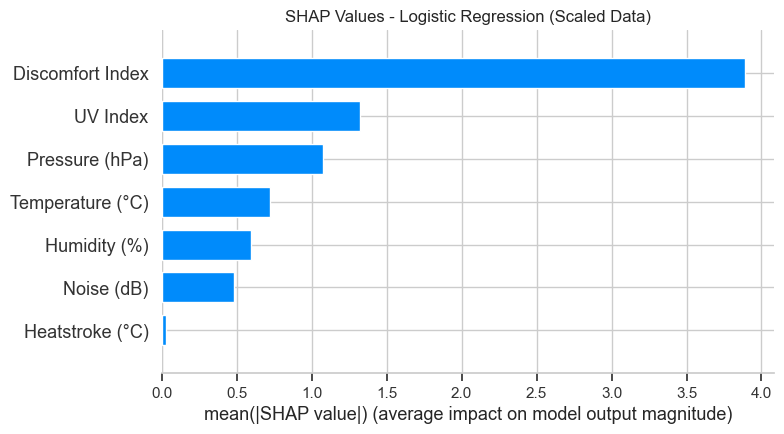

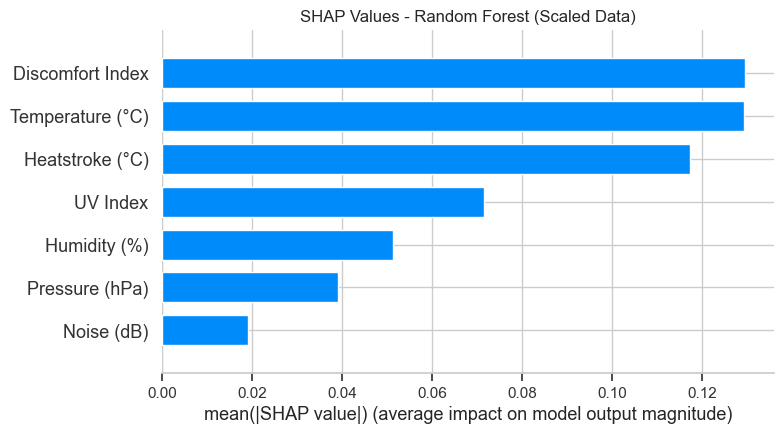

In [69]:
import shap
# Fit the models on the entire scaled training set
lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Compute and plot SHAP values for Logistic Regression
explainer_lr_scaled = shap.Explainer(lr, X_train_scaled)
shap_values_lr_scaled = explainer_lr_scaled(X_train_scaled)

shap.summary_plot(shap_values_lr_scaled, X_train_scaled, plot_type="bar", show=False)
plt.title('SHAP Values - Logistic Regression (Scaled Data)')
plt.show()

# Compute and plot SHAP values for Random Forest
explainer_rf_scaled = shap.TreeExplainer(rf)
shap_values_rf_scaled = explainer_rf_scaled.shap_values(X_train_scaled)

# For binary classification, SHAP values are computed for each class; we take the SHAP values for the positive class
shap.summary_plot(shap_values_rf_scaled[1], X_train_scaled, plot_type="bar", show=False)
plt.title('SHAP Values - Random Forest (Scaled Data)')
plt.show()

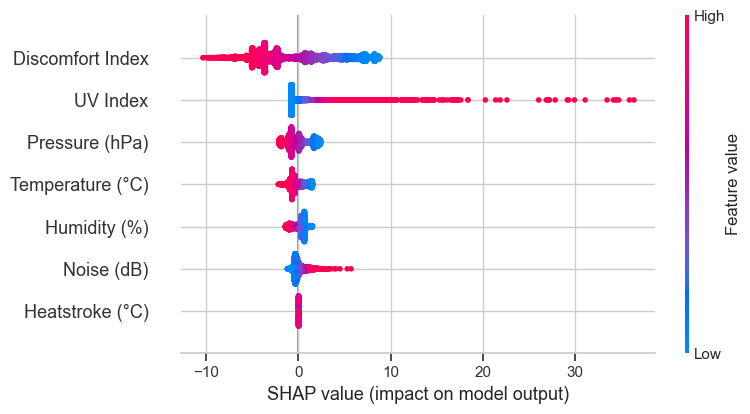

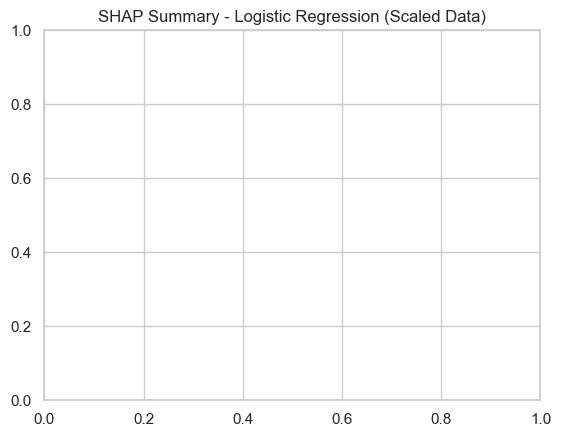

In [70]:
shap.summary_plot(shap_values_lr_scaled, X_train_scaled)
plt.title('SHAP Summary - Logistic Regression (Scaled Data)')
plt.show()

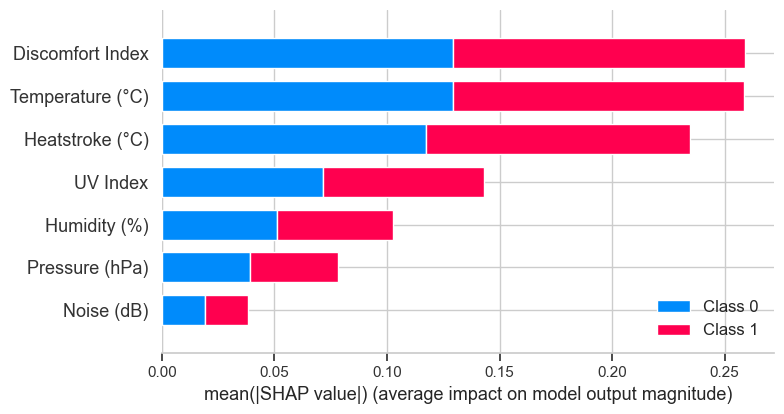

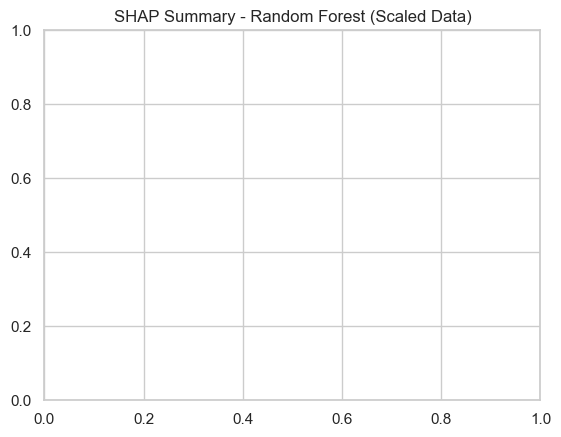

In [71]:
shap.summary_plot(shap_values_rf_scaled, X_train_scaled)
plt.title('SHAP Summary - Random Forest (Scaled Data)')
plt.show()

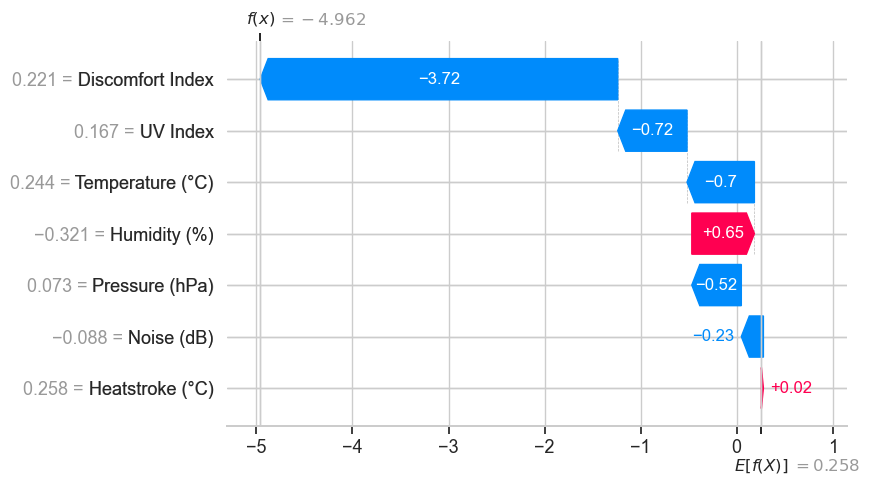

In [72]:
shap.plots.waterfall(shap_values_lr_scaled[10])

# Running Baseline Machine Learning Models with 5-fold Cross-Validation

In [73]:
#Import the libraries

In [74]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score

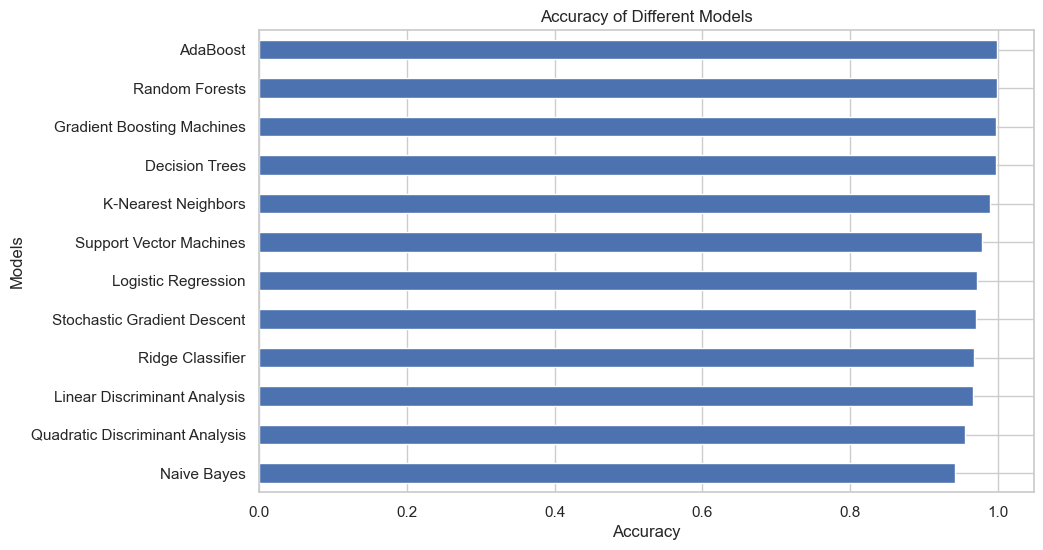

Accuracy  Precision    Recall  F1 Score
Logistic Regression              0.971484   0.973010  0.969922  0.971450
Decision Trees                   0.997461   0.998049  0.996875  0.997460
Random Forests                   0.998242   0.999607  0.996875  0.998238
Gradient Boosting Machines       0.997656   0.998826  0.996484  0.997652
Support Vector Machines          0.978125   0.969384  0.987500  0.978328
K-Nearest Neighbors              0.989258   0.990993  0.987500  0.989237
Naive Bayes                      0.941406   0.935681  0.948047  0.941787
Linear Discriminant Analysis     0.965430   0.968613  0.962109  0.965324
Quadratic Discriminant Analysis  0.955469   0.941027  0.971875  0.956194
AdaBoost                         0.998437   0.999216  0.997656  0.998433
Stochastic Gradient Descent      0.970703   0.981008  0.960547  0.970259
Ridge Classifier                 0.967773   0.976182  0.958984  0.967481

In [75]:
# Initiate the models
models = {
    'Logistic Regression': LogisticRegression(random_state=random_seed),
    'Decision Trees': DecisionTreeClassifier(random_state=random_seed),
    'Random Forests': RandomForestClassifier(random_state=random_seed),
    'Gradient Boosting Machines': GradientBoostingClassifier(random_state=random_seed),
    'Support Vector Machines': SVC(random_state=random_seed),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(random_state=random_seed),
    'Stochastic Gradient Descent': SGDClassifier(random_state=random_seed),
    'Ridge Classifier': RidgeClassifier(random_state=random_seed),
}

# Initialize the metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

# Initialize a dictionary to hold the final scores for each model
final_scores = {metric: {} for metric in metrics.keys()}

# Compute cross-validated scores for each model and each metric
for model_name, model in models.items():
    for metric_name, metric in metrics.items():
        if metric_name == "Accuracy":
            scorer = make_scorer(metric)
        else:
            scorer = make_scorer(metric, zero_division=0)

        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=scorer)
        final_scores[metric_name][model_name] = scores.mean()

final_scores_df = pd.DataFrame(final_scores)

# Bar plot of accuracy
final_scores_df['Accuracy'].sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title("Accuracy of Different Models")
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.show()

final_scores_df

# Machine Learning: Feature Engineering

# Temperature, Discomfort Index and Heatstroke combined using PCA

In [76]:
# Import necessary libraries
from sklearn.decomposition import PCA

In [77]:
# Calculate the average of the relevant features in the training set
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_engineered = X_train_scaled_df.copy()
X_train_engineered['composite_heat_index'] = X_train_scaled_df[['Temperature (°C)', 'Discomfort Index', 'Heatstroke (°C)']].mean(axis=1)

# Drop the original features
X_train_engineered = X_train_engineered.drop(columns=['Temperature (°C)', 'Discomfort Index', 'Heatstroke (°C)'])

# Show the engineered features
X_train_engineered.head()

Humidity (%)   UV Index  Pressure (hPa)  Noise (dB)  composite_heat_index
0      0.741070   0.000000        0.131387   -0.227459             -1.501430
1     -0.391808  -0.166667        0.197080   -0.180328              0.227422
2     -0.452770   0.166667        0.613139   -0.088115              0.316420
3      0.165106   0.000000       -0.897810   -0.088115              0.293845
4     -0.922051  11.666667        0.277372   -0.180328              0.674598

In [78]:
# Let us save this for later use

In [79]:
# Calculate the average of the relevant features in the test set
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_engineered = X_test_scaled_df.copy()
X_test_engineered['composite_heat_index'] = X_test_scaled_df[['Temperature (°C)', 'Discomfort Index', 'Heatstroke (°C)']].mean(axis=1)

# Drop the original features
X_test_engineered = X_test_engineered.drop(columns=['Temperature (°C)', 'Discomfort Index', 'Heatstroke (°C)'])

# Show the engineered features
X_test_engineered.head()

Humidity (%)   UV Index  Pressure (hPa)  Noise (dB)  composite_heat_index
0     -0.063502   5.000000       -1.109489    2.303279             -0.377144
1      0.467376  11.833333       -1.094891    1.010246             -0.166025
2      0.041911   0.000000       -0.795620   -0.600410              0.145909
3     -0.215907  15.166667        0.131387   -0.180328             -0.174906
4     -0.317511   0.166667       -0.051095   -0.485656              0.474491

In [80]:
# Clustering Analysis

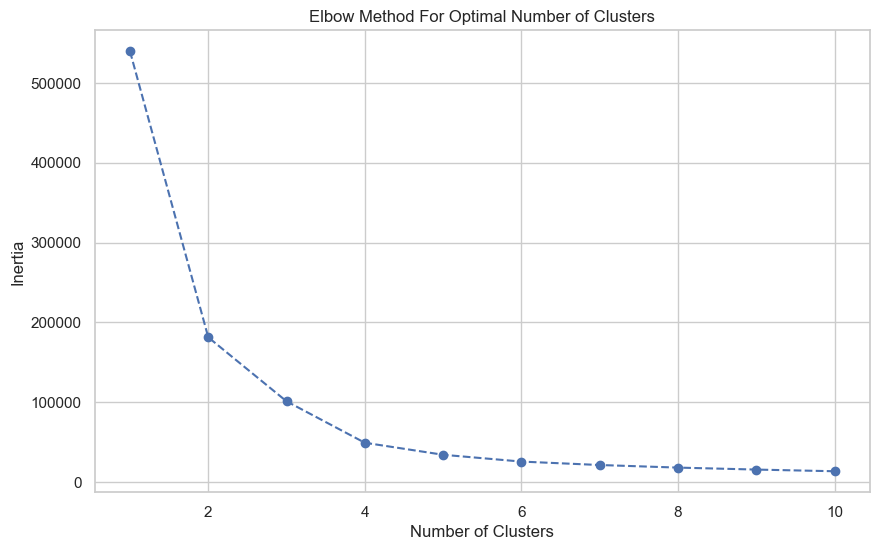

In [81]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Determine the optimal number of clusters using the Elbow method
inertia = []
range_clusters = range(1, 11)  # Checking for up to 10 clusters

for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X_train_engineered)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [82]:
# Apply KMeans clustering with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=random_seed).fit(X_train_engineered)
labels_2 = kmeans_2.predict(X_train_engineered)

# Group the data by cluster labels and compute the mean and standard deviation
cluster_summary = X_train_engineered.groupby(labels_2).agg(['mean', 'std'])
cluster_summary.index = ['Cluster 0', 'Cluster 1']
cluster_summary

Humidity (%)             UV Index            Pressure (hPa)  \
                  mean       std       mean        std           mean   
Cluster 0     0.216316  0.572291   1.627380   3.844843      -0.191351   
Cluster 1    -0.453531  0.344016  46.799451  23.300185      -0.100666   

                    Noise (dB)           composite_heat_index            
                std       mean       std                 mean       std  
Cluster 0  0.536814   0.338823  0.966659            -0.267574  0.633513  
Cluster 1  0.749615   1.049214  1.158111             0.512517  0.454048

In [83]:
cluster_summary.to_excel("cluster_summary.xlsx")

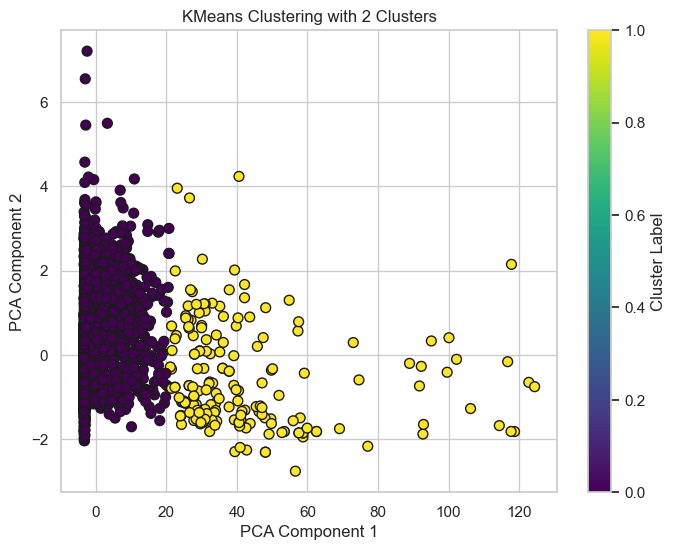

In [84]:
# Importing necessary libraries
import pandas as pd
from sklearn.decomposition import PCA

# Reduce the dimensionality of the data using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_train_engineered)

# Plot the clusters for 2 clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_2, cmap='viridis', edgecolor='k', s=50)
plt.colorbar().set_label('Cluster Label')
plt.title('KMeans Clustering with 2 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Checking the effect of engineered feature if a lot of information is carried from the original features  

In [86]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=random_seed),
    'Decision Trees': DecisionTreeClassifier(random_state=random_seed),
    'Random Forests': RandomForestClassifier(random_state=random_seed),
    'Gradient Boosting Machines': GradientBoostingClassifier(random_state=random_seed),
    'Support Vector Machines': SVC(random_state=random_seed),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Stochastic Gradient Descent': SGDClassifier(random_state=random_seed),
    'Ridge Classifier': RidgeClassifier(random_state=random_seed),
}

# Initialize the metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

# Initialize a dictionary to hold the final scores for each model
final_scores = {metric: {} for metric in metrics.keys()}
final_scores_engineered = {metric: {} for metric in metrics.keys()}

# Compute cross-validated scores for each model and each metric
for model_name, model in models.items():
    for metric_name, metric in metrics.items():
        if metric_name == "Accuracy":
            scorer = make_scorer(metric)
        else:
            scorer = make_scorer(metric, zero_division=0)

        scores = cross_val_score(model, X_train_scaled_df, y_train, cv=5, scoring=scorer)
        final_scores[metric_name][model_name] = scores.mean()

        scores = cross_val_score(model, X_train_engineered, y_train, cv=5, scoring=scorer)
        final_scores_engineered[metric_name][model_name] = scores.mean()

final_scores_df = pd.DataFrame(final_scores)
final_scores_engineered_df = pd.DataFrame(final_scores_engineered)

# Merge the baseline and engineered results for easy comparison
results_comparison = pd.merge(final_scores_df, final_scores_engineered_df, left_index=True, right_index=True, suffixes=('_Baseline', '_Engineered'))
results_comparison

Accuracy_Baseline  Precision_Baseline  \
Logistic Regression                       0.971484            0.973010   
Decision Trees                            0.997461            0.998049   
Random Forests                            0.998242            0.999607   
Gradient Boosting Machines                0.997656            0.998826   
Support Vector Machines                   0.978125            0.969384   
K-Nearest Neighbors                       0.989258            0.990993   
Naive Bayes                               0.941406            0.935681   
Linear Discriminant Analysis              0.965430            0.968613   
Quadratic Discriminant Analysis           0.955469            0.941027   
AdaBoost                                  0.998437            0.999216   
Stochastic Gradient Descent               0.970703            0.981008   
Ridge Classifier                          0.967773            0.976182   

                                 Recall_Baseline  F1 Score_Baseline  \
Logistic Regression                     0.969922           0.971450   
Decision Trees                          0.996875           0.997460   
Random Forests                          0.996875           0.998238   
Gradient Boosting Machines              0.996484           0.997652   
Support Vector Machines                 0.987500           0.978328   
K-Nearest Neighbors                     0.987500           0.989237   
Naive Bayes                             0.948047           0.941787   
Linear Discriminant Analysis            0.962109           0.965324   
Quadratic Discriminant Analysis         0.971875           0.956194   
AdaBoost                                0.997656           0.998433   
Stochastic Gradient Descent             0.960547           0.970259   
Ridge Classifier                        0.958984           0.967481   

                                 Accuracy_Engineered  Precision_Engineered  \
Logistic Regression                         0.970898              0.971889   
Decision Trees                              0.997656              0.998436   
Random Forests                              0.998437              0.999607   
Gradient Boosting Machines                  0.997852              0.999217   
Support Vector Machines                     0.983984              0.986342   
K-Nearest Neighbors                         0.987305              0.988659   
Naive Bayes                                 0.940039              0.928677   
Linear Discriminant Analysis                0.960938              0.960617   
Quadratic Discriminant Analysis             0.953711              0.937218   
AdaBoost                                    0.997852              0.998435   
Stochastic Gradient Descent                 0.972461              0.975762   
Ridge Classifier                            0.960938              0.960617   

                                 Recall_Engineered  F1 Score_Engineered  
Logistic Regression                       0.969922             0.970885  
Decision Trees                            0.996875             0.997653  
Random Forests                            0.997266             0.998434  
Gradient Boosting Machines                0.996484             0.997847  
Support Vector Machines                   0.981641             0.983942  
K-Nearest Neighbors                       0.985938             0.987289  
Naive Bayes                               0.953516             0.940871  
Linear Discriminant Analysis              0.961328             0.960947  
Quadratic Discriminant Analysis           0.972656             0.954586  
AdaBoost                                  0.997266             0.997849  
Stochastic Gradient Descent               0.969141             0.972222  
Ridge Classifier                          0.961328             0.960947

In [87]:
# Let us visualise the performance of the models on engineered training set

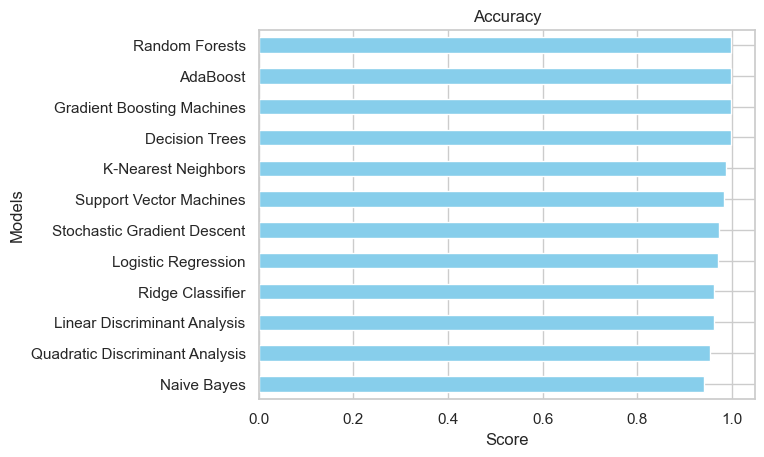

In [88]:
# Plot accuracy
results_comparison['Accuracy_Engineered'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Accuracy')
plt.xlabel('Score')
plt.ylabel('Models')
plt.show()

# Writing out the engineered features

In [89]:
# Assuming X_train_engineered and X_test_engineered
X_train_engineered.to_csv('X_train_eng.csv', index=False)
X_test_engineered.to_csv('X_test_eng.csv', index=False)

# Convert y_train and y_test to pandas Series and write to CSV
y_train_series = pd.Series(y_train, name='location')
y_train_series.to_csv('y_train.csv', index=False)

y_test_series = pd.Series(y_test, name='location')
y_test_series.to_csv('y_test.csv', index=False)